# **La compréhension du problème métier**

# 1- Contexte
Le retard des vols est un problème majeur dans l'industrie aérienne qui impacte non seulement la satisfaction des passagers, mais aussi les coûts opérationnels des compagnies aériennes et des aéroports.

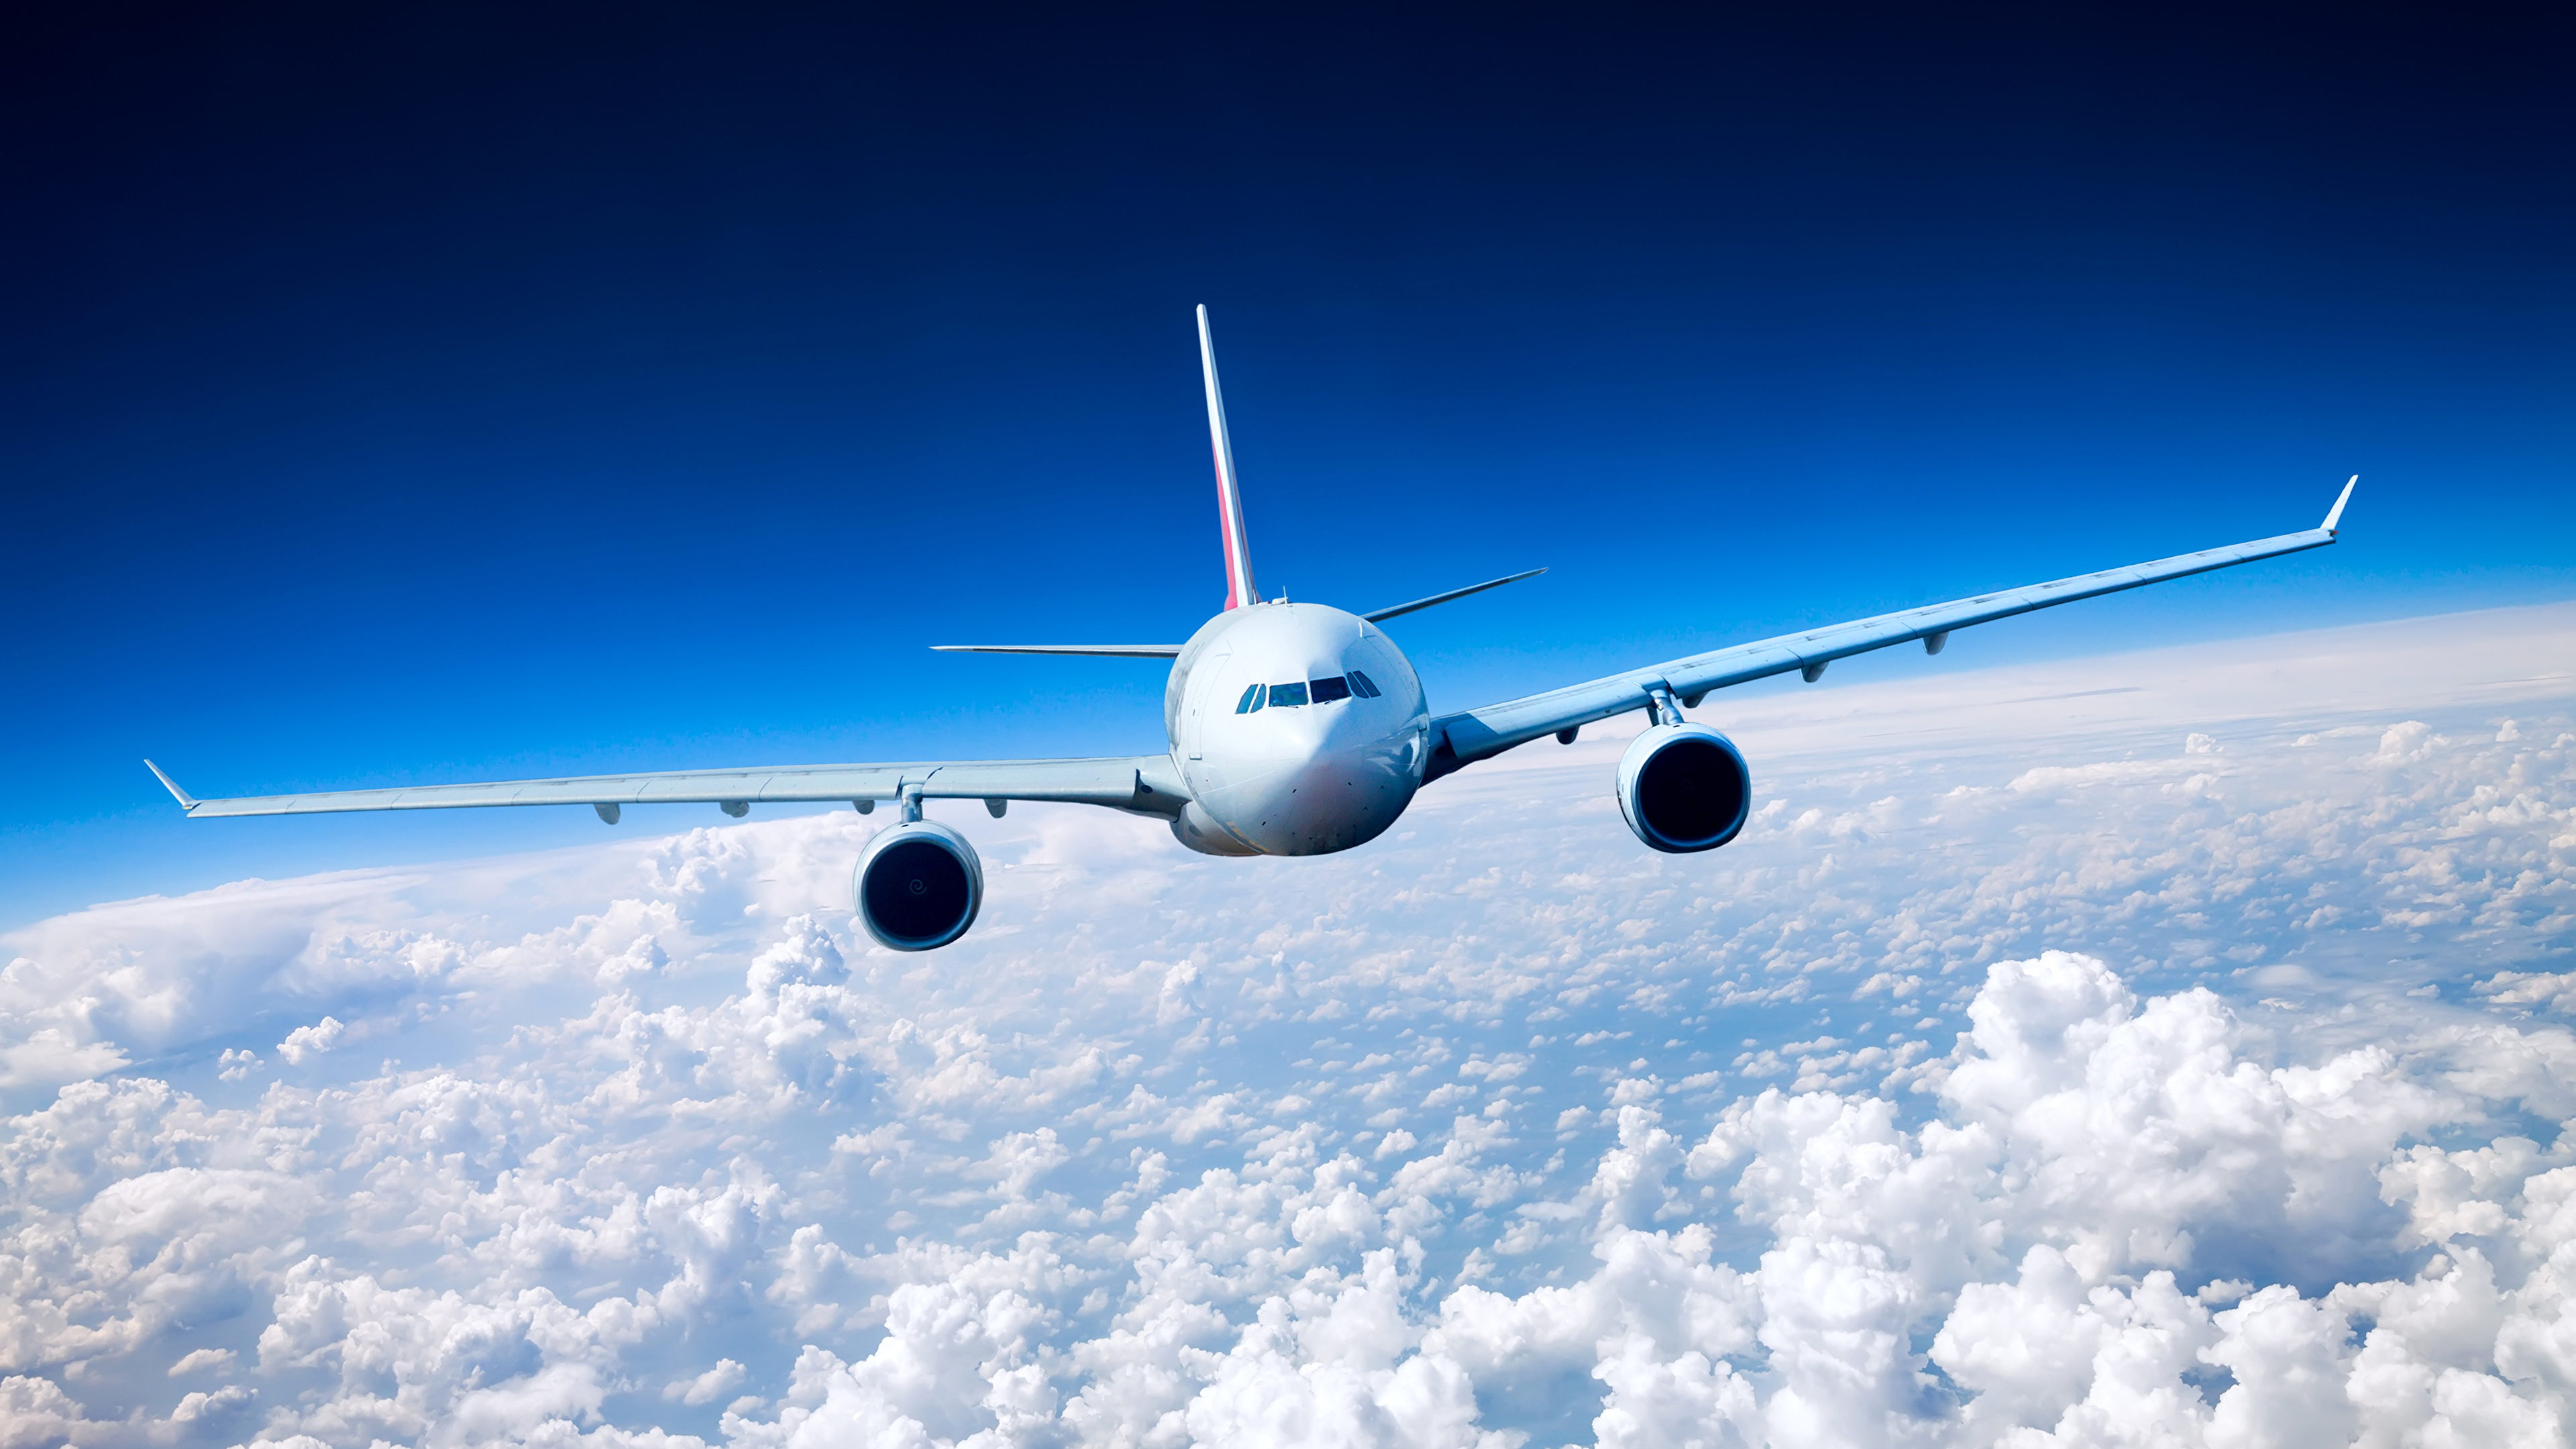

In [6]:
Image(filename="images/avion.jpg")

# 2- Objectif
La tâche consiste à prédire le retard des vols (en minutes ou en heures) en fonction de plusieurs caractéristiques disponibles dans un jeu de données contenant des informations sur les vols.

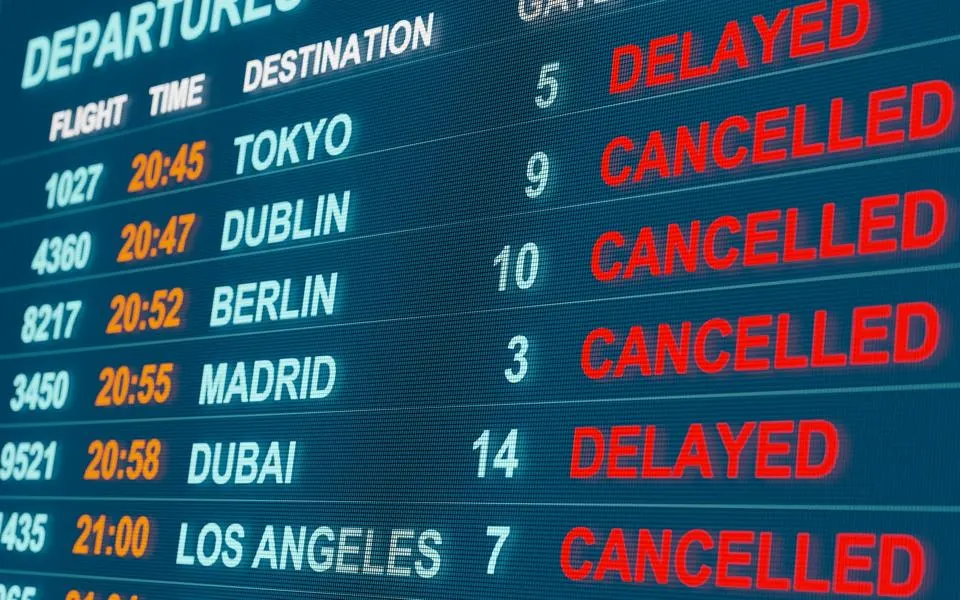

In [16]:
Image(filename="images/cancelation_delay.jpg", width=800, height=100)

# **La compréhension des données**

Importation de biblioteques

In [2]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(25,10)})

In [2]:
df_airlines = pd.read_csv("../data/airlines.csv")
df_aiports = pd.read_csv("../data/airports.csv")
df_flight = pd.read_csv("../data/flights.csv")

C:\Users\debgn\AppData\Local\Temp\ipykernel_16360\3853904211.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flight = pd.read_csv("../data/flights.csv")


# 1- Description des caractéristiques
Le jeu de données des retards de vol provient de la Federal Aviation Administration (FAA) et contient des informations sur les vols opérés aux États-Unis. 
Voici une description des principales caractéristiques présentes dans ces jeux de données

## jeux de données flights

In [3]:
df_flight.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   
1            LAX                 PBI                   10             2.0   
2            SFO                 CLT                   20            18.0   
3            LAX                 MIA                   20            15.0   
4            SEA                 ANC                   25            24.0   

   DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
0            -11.0      21.0        15.0           205.0         194.0   
1             -8.0      12.0        14.0           280.0         279.0   
2             -2.0      16.0        34.0           286.0         293.0   
3             -5.0      15.0        30.0           285.0         281.0   
4             -1.0      11.0        35.0           235.0         215.0   

   AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0     169.0      1448      404.0      4.0                430         408.0   
1     263.0      2330      737.0      4.0                750         741.0   
2     266.0      2296      800.0     11.0                806         811.0   
3     258.0      2342      748.0      8.0                805         756.0   
4     199.0      1448      254.0      5.0                320         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                 NaN               NaN   
1           -9.0         0          0                 NaN               NaN   
2            5.0         0          0                 NaN               NaN   
3           -9.0         0          0                 NaN               NaN   
4          -21.0         0          0                 NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  
2             NaN            NaN                  NaN            NaN  
3             NaN            NaN                  NaN            NaN  
4             NaN            NaN                  NaN            NaN


Voici une description des caractéristiques de la dataset flights 

### **Informations sur la date et l'heure**

- <span style="color:blue;">*YEAR*</span> : Année de l’enregistrement du vol (utile pour analyser les tendances annuelles). Ce jeux de donneé concerne les infomation de **2015**
- <span style="color:blue;">*MONTH*</span> : Mois de l’enregistrement du vol (utile pour détecter des tendances saisonnières).
- <span style="color:blue;">*DAY*</span> : Jour du mois de l’enregistrement (utile pour identifier des motifs quotidiens ou mensuels).
- <span style="color:blue;">*DAY_OF_WEEK*</span> : Jour de la semaine (de 1 pour lundi à 7 pour dimanche), permet d’analyser les différences selon les jours.

### **Informations sur la compagnie et le vol**

- <span style="color:blue;">*AIRLINE*</span> : Code de la compagnie aérienne, permet d’identifier les compagnies responsables de potentiels retards.
- <span style="color:blue;">*FLIGHT_NUMBER*</span> : Numéro du vol, identifiant spécifique du vol.
- <span style="color:blue;">*TAIL_NUMBER*</span> : Numéro de queue de l’avion (identifiant unique pour suivre les performances des avions individuels).

### **Informations sur les aéroports**

- <span style="color:blue;">*ORIGIN_AIRPORT*</span> : Code de l’aéroport d’origine (peut influencer les retards dus aux infrastructures ou au trafic local).
- <span style="color:blue;">*DESTINATION_AIRPORT*</span> : Code de l’aéroport de destination (utile pour analyser les retards à l’arrivée).

### **Informations sur le départ**

- <span style="color:blue;">*SCHEDULED_DEPARTURE*</span> :  Heure planifiée de départ en minutes (format HHMM).
- <span style="color:blue;">*DEPARTURE_TIME*</span> : Heure réelle de départ en minutes (format HHMM).
- <span style="color:blue;">*DEPARTURE_DELAY*</span> :  Retard au départ en minutes (négatif si le vol part en avance).

### **Informations pendant le vol**

- <span style="color:blue;">*TAXI_OUT*</span> :  Temps de roulage au sol avant le décollage (en minutes).
- <span style="color:blue;">*WHEELS_OFF*</span> : Heure où l’avion quitte le sol (en minutes, format HHMM).
- <span style="color:blue;">*SCHEDULED_TIME*</span> : Durée prévue du vol (en minutes).
- <span style="color:blue;">*ELAPSED_TIME*</span> : temps total écoulé réel (en minutes).
- <span style="color:blue;">*AIR_TIME*</span> : Temps passé dans les airs (en minutes).
- <span style="color:blue;">*DISTANCE*</span> :  Distance parcourue pendant le vol (en miles).

### **Informations sur l’arrivée**

- <span style="color:blue;">*WHEELS_ON*</span> :  Heure où l’avion touche le sol à destination (en minutes, format HHMM).
- <span style="color:blue;">*TAXI_IN*</span> : Temps de roulage au sol après l’atterrissage (en minutes).
- <span style="color:blue;">*SCHEDULED_ARRIVAL*</span> :Heure planifiée d’arrivée en minutes (format HHMM).
- <span style="color:blue;">*ARRIVAL_TIME*</span> :  Heure réelle d’arrivée en minutes (format HHMM).
- <span style="color:blue;">*ARRIVAL_DELAY*</span> : Temps passé dans les airs (en minutes).

### **Informations sur les événements inhabituels**

- <span style="color:blue;">*DIVERTED*</span> :  Indique si le vol a été dérouté (1 pour oui, 0 pour non).
- <span style="color:blue;">*CANCELLED*</span> : Indique si le vol a été annulé (1 pour oui, 0 pour non)
- <span style="color:blue;">*CANCELLATION_REASON*</span> :Motif de l’annulation 

### **Informations sur les types de retard**

- <span style="color:blue;">*AIR_SYSTEM_DELAY*</span> : Retard dû aux systèmes de contrôle du trafic aérien (en minutes).
- <span style="color:blue;">*SECURITY_DELAY*</span> : Retard  dû aux contrôles de sécurité (en minutes).
- <span style="color:blue;">*AIRLINE_DELAY*</span> :Retard  causé par la compagnie aérienne (en minutes). 
- <span style="color:blue;">*LATE_AIRCRAFT_DELAY*</span> :  Retard causé par l’arrivée tardive d’un autre avion (en minutes).
- <span style="color:blue;">*WEATHER_DELAY*</span> : Délai causé par des conditions météorologiques (en minutes).

## jeux de données Airlines

In [4]:
df_airlines.head(100)

IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America

Ce jeux de données est un complement de la base flights, elle sert à associé le nom de la compagnie au Code de la compagnie aérienne

- <span style="color:blue;">*IATA_CODE*</span> : Code unique de deux lettres attribué par l'IATA (International Air Transport Association) pour identifier les compagnies aériennes.
- <span style="color:blue;">*AIRLINE*</span> : Nom complet de la compagnie aérienne correspondant au code IATA.


## jeux de données Airports

In [5]:
df_aiports.head()

IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447

In [19]:
df_aiports.shape

(322, 7)

Cette base complete la base flights en ajouter le nom des aeroport, la ville, le pays ainsi que le coordonnées géographiques

- <span style="color:blue;">*IATA_CODE*</span> : Code unique de trois lettres attribué par l'IATA pour identifier un aéroport spécifique.
- <span style="color:blue;">*AIRPORT*</span> : Nom complet de l'aéroport.
- <span style="color:blue;">*CITY*</span> : Ville où se situe l'aéroport.
- <span style="color:blue;">*STATE*</span> : État (pour les États-Unis) où se trouve l'aéroport.
- <span style="color:blue;">*COUNTRY*</span> : Pays où se situe l'aéroport (dans ce dataset, il s'agit principalement des États-Unis).
- <span style="color:blue;">*LATITUDE*</span> : Coordonnée géographique indiquant la latitude de l'aéroport (utile pour la géolocalisation et l'analyse des distances).
- <span style="color:blue;">*LONGITUDE*</span> : Coordonnée géographique indiquant la longitude de l'aéroport (utile pour la géolocalisation et l'analyse des distances).


# 2- Cleaning

In [7]:
df_flight.shape

(5819079, 31)

Cette base contient <span style="color:blue;">*5819079*</span> sample dont <span style="color:blue;">*31*</span>  features

In [8]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [3]:
duplicates = df_flight[df_flight.duplicated()]
print(f"Nombre de lignes dupliquées : {len(duplicates)}")


Nombre de lignes dupliquées : 0


#### formater les variables donnant des information sur le temps

Dans le dataframe initial, les dates sont codées selon 3 variables : YEAR, MONTH, DAY 

In [4]:
df_flight['DATE'] = pd.to_datetime(df_flight[['YEAR','MONTH', 'DAY']])
df_flight['DATE']

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: DATE, Length: 5819079, dtype: datetime64[ns]

De plus, dans la variable **SCHEDULED_DEPARTURE**..., l'heure du décollage sont codées sous forme de float où les deux premiers chiffres indiquent l'heure et les deux derniers, les minutes. Ce format n'est pas pratique et je le convertis donc. Finalement, je fusionne l'heure de décollage avec la date du vol. Pour procéder à ces transformations, je définis quelques fonctions :

### Faire Correspondre les trois jeux de Données en les fusionnant

In [5]:
# joindre airlines
df_flight = df_flight.merge(df_airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
# supprimer l'ancienne colonne et renommer la nouvelle
df_flight = df_flight.drop(['AIRLINE_x','IATA_CODE'], axis=1)
df_flight = df_flight.rename(columns={"AIRLINE_y":"AIRLINE"})


# Fusion des données pour inclure les coordonnées des origines et destinations
df_flight = df_flight.merge(df_aiports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left') \
                     .rename(columns={"LATITUDE": "ORIGIN_LAT", "LONGITUDE": "ORIGIN_LON", "AIRPORT": "ORIGIN_AIRPORT_NAME", "CITY":"ORIGIN_CITY","STATE":"ORIGIN_STATE","COUNTRY":"ORIGIN_COUNTRY"})
df_flight = df_flight.merge(df_aiports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left') \
                   .rename(columns={"LATITUDE": "DEST_LAT", "LONGITUDE": "DEST_LON", "AIRPORT": "DEST_AIRPORT_NAME", "CITY":"DEST_CITY","STATE":"DEST_STATE","COUNTRY":"DEST_COUNTRY"})

In [12]:
df_flight.head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  \
0  2015      1    1            4             98      N407AS            ANC   
1  2015      1    1            4           2336      N3KUAA            LAX   
2  2015      1    1            4            840      N171US            SFO   
3  2015      1    1            4            258      N3HYAA            LAX   
4  2015      1    1            4            135      N527AS            SEA   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
0                 SEA                    5          2354.0            -11.0   
1                 PBI                   10             2.0             -8.0   
2                 CLT                   20            18.0             -2.0   
3                 MIA                   20            15.0             -5.0   
4                 ANC                   25            24.0             -1.0   

   TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  \
0      21.0        15.0           205.0         194.0     169.0      1448   
1      12.0        14.0           280.0         279.0     263.0      2330   
2      16.0        34.0           286.0         293.0     266.0      2296   
3      15.0        30.0           285.0         281.0     258.0      2342   
4      11.0        35.0           235.0         215.0     199.0      1448   

   WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
0      404.0      4.0                430         408.0          -22.0   
1      737.0      4.0                750         741.0           -9.0   
2      800.0     11.0                806         811.0            5.0   
3      748.0      8.0                805         756.0           -9.0   
4      254.0      5.0                320         259.0          -21.0   

   DIVERTED  CANCELLED CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
0         0          0                 NaN               NaN             NaN   
1         0          0                 NaN               NaN             NaN   
2         0          0                 NaN               NaN             NaN   
3         0          0                 NaN               NaN             NaN   
4         0          0                 NaN               NaN             NaN   

   AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY       DATE  \
0            NaN                  NaN            NaN 2015-01-01   
1            NaN                  NaN            NaN 2015-01-01   
2            NaN                  NaN            NaN 2015-01-01   
3            NaN                  NaN            NaN 2015-01-01   
4            NaN                  NaN            NaN 2015-01-01   

                  AIRLINE IATA_CODE_x  \
0    Alaska Airlines Inc.         ANC   
1  American Airlines Inc.         LAX   
2         US Airways Inc.         SFO   
3  American Airlines Inc.         LAX   
4    Alaska Airlines Inc.         SEA   

                           ORIGIN_AIRPORT_NAME    ORIGIN_CITY ORIGIN_STATE  \
0  Ted Stevens Anchorage International Airport      Anchorage           AK   
1            Los Angeles International Airport    Los Angeles           CA   
2          San Francisco International Airport  San Francisco           CA   
3            Los Angeles International Airport    Los Angeles           CA   
4         Seattle-Tacoma International Airport        Seattle           WA   

  ORIGIN_COUNTRY  ORIGIN_LAT  ORIGIN_LON IATA_CODE_y  \
0            USA    61.17432  -149.99619         SEA   
1            USA    33.94254  -118.40807         PBI   
2            USA    37.61900  -122.37484         CLT   
3            USA    33.94254  -118.40807         MIA   
4            USA    47.44898  -122.30931         ANC   

                             DEST_AIRPORT_NAME        DEST_CITY DEST_STATE  \
0         Seattle-Tacoma International Airport          Seattle         WA   
1             Palm Beach International Airport  West Palm Beach 

# 3- Exploration des Données

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\2020646258.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='coolwarm')


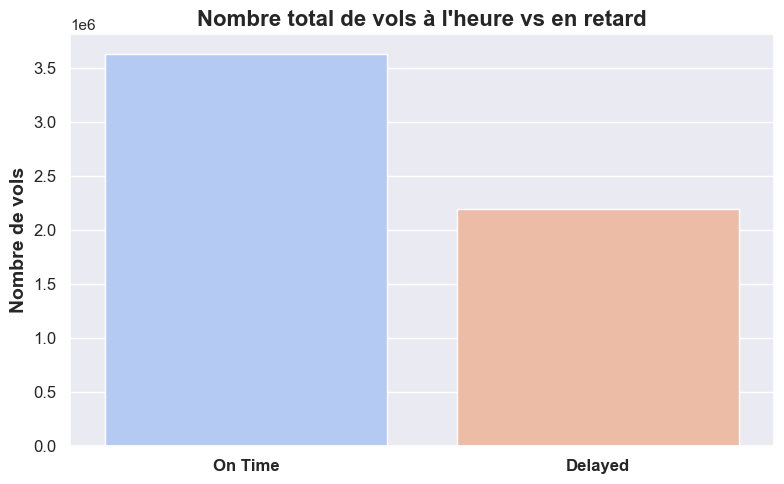

In [13]:

# Créer les catégories
total_flights = len(df_flight)
on_time_count = df_flight[df_flight['ARRIVAL_DELAY'] <= 0].shape[0]
delayed_count = total_flights - on_time_count

# Préparer les données pour la visualisation
categories = ['On Time', 'Delayed']
counts = [on_time_count, delayed_count]

# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=counts, palette='coolwarm')

# Ajouter des détails au graphique
plt.title('Nombre total de vols à l\'heure vs en retard', fontsize=16, weight='bold')
plt.ylabel('Nombre de vols', fontsize=14, weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12)
plt.tight_layout()

# Afficher le graphique
plt.show()


### 1- Analyse des retards par compagnie aérienne

<AxesSubplot: xlabel='ARRIVAL_DELAY', ylabel='AIRLINE'>

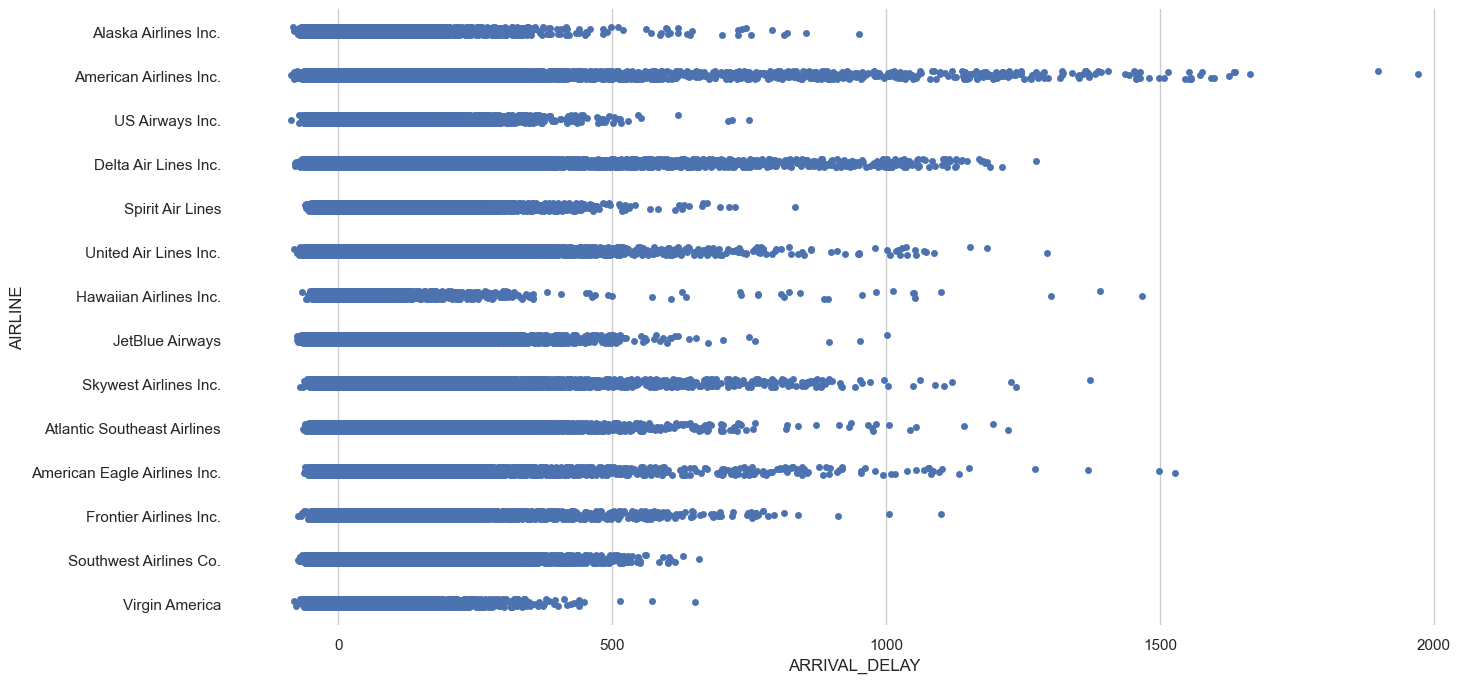

In [14]:
sns.set(style="whitegrid")

fig_dim = (16,8)
f, ax = plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

# Afficher chaque observation avec un nuage de points
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data=df_flight, dodge=True, jitter=True
            )

La répartition ci-dessus montre **les compagnies aériennes en comparaison avec leurs ARRIVAL_DELAYS**. Elle montre clairement **qu'American Airlines** a une large répartition des retards. 

Classement des retards en fonction des airlines . On considere 
* les retard de moins de 5 minutes comme étant à l'heur
* ceux compris entre 5 < t < 45 min sont un peu en retard
* et enfin les retards supérieurs à 45 minutes étant tres en retard 

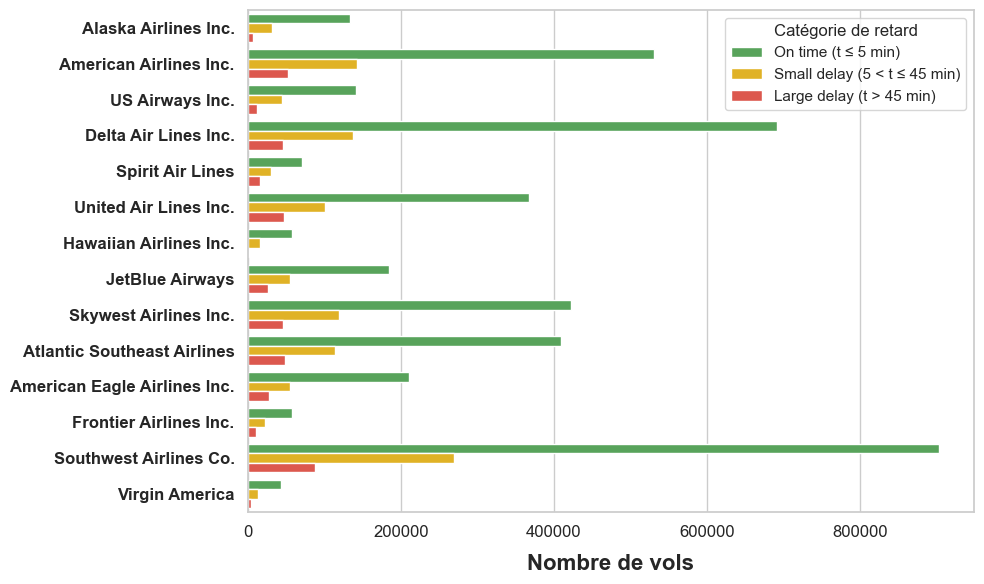

In [15]:
# Fonction pour catégoriser les retards
delay_type = lambda x: ((0, 1)[x > 5], 2)[x > 45]

# Application de la fonction pour créer une nouvelle colonne
df_flight['DELAY_LEVEL'] = df_flight['ARRIVAL_DELAY'].apply(delay_type)

# Création du graphique
fig = plt.figure(1, figsize=(10, 6))
ax = sns.countplot(y="AIRLINE", hue="DELAY_LEVEL", data=df_flight, 
                   palette=['#4CAF50', '#FFC107', '#F44336'])

# Personnalisation des étiquettes et des axes
plt.setp(ax.get_xticklabels(), fontsize=12, weight='normal', rotation=0)
plt.setp(ax.get_yticklabels(), fontsize=12, weight='bold', rotation=0)
ax.yaxis.label.set_visible(False)
plt.xlabel('Nombre de vols', fontsize=16, weight='bold', labelpad=10)

# Personnalisation de la légende
L = plt.legend(title='Catégorie de retard')
L.get_texts()[0].set_text('On time (t ≤ 5 min)')
L.get_texts()[1].set_text('Small delay (5 < t ≤ 45 min)')
L.get_texts()[2].set_text('Large delay (t > 45 min)')

# Affichage du graphique
plt.tight_layout()
plt.show()


De façon Générale, la plus part des vols sont à l'heur , on remarque aussi que les retard sont en relation avec le nombre de vols, plus un airline a de vols et plus il a de retard.
pour voir  le retard  indépendamment de la taille ou du volume total de ses vols, nous allons plutot calculé les proportion

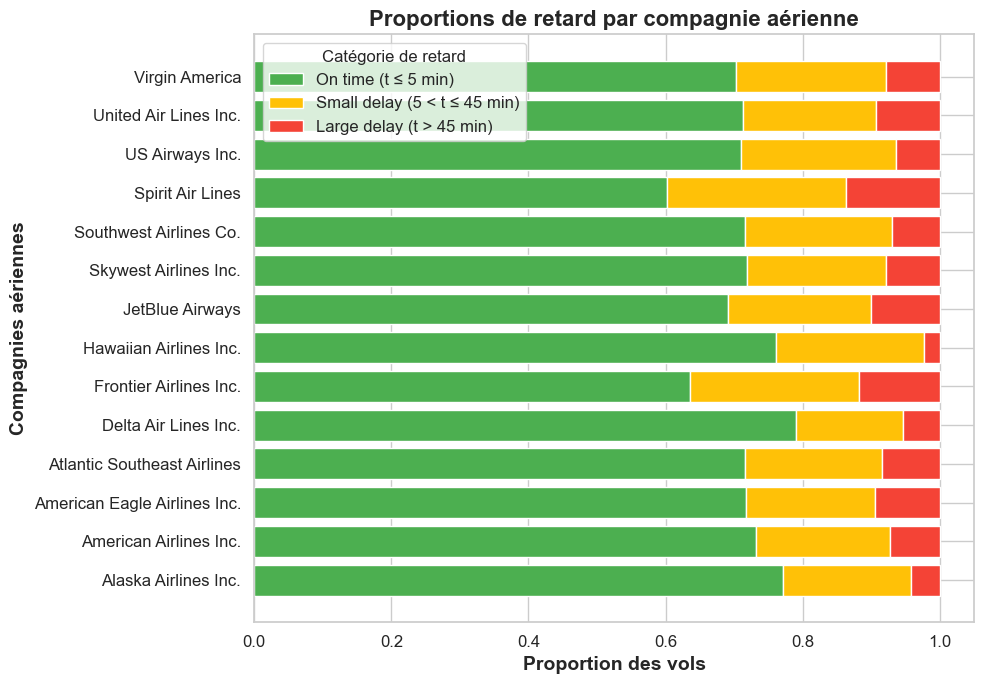

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour catégoriser les retards
delay_type = lambda x: ((0, 1)[x > 5], 2)[x > 45]
df_flight['DELAY_LEVEL'] = df_flight['ARRIVAL_DELAY'].apply(delay_type)

# Calcul des proportions
delay_counts = df_flight.groupby(['AIRLINE', 'DELAY_LEVEL']).size().unstack(fill_value=0)
total_flights = delay_counts.sum(axis=1)
delay_proportions = delay_counts.div(total_flights, axis=0)

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 7))

# Empiler les proportions par catégorie de retard
categories = ['On time (t ≤ 5 min)', 'Small delay (5 < t ≤ 45 min)', 'Large delay (t > 45 min)']
colors = ['#4CAF50', '#FFC107', '#F44336']

for i, category in enumerate(categories):
    ax.barh(
        delay_proportions.index, 
        delay_proportions[i], 
        left=delay_proportions.iloc[:, :i].sum(axis=1) if i > 0 else 0,
        color=colors[i], 
        label=category
    )

# Personnalisation du graphique
ax.set_xlabel('Proportion des vols', fontsize=14, weight='bold')
ax.set_ylabel('Compagnies aériennes', fontsize=14, weight='bold')
ax.set_title('Proportions de retard par compagnie aérienne', fontsize=16, weight='bold')
ax.legend(title="Catégorie de retard", fontsize=12)

# Ajustement des étiquettes
plt.setp(ax.get_xticklabels(), fontsize=12)
plt.setp(ax.get_yticklabels(), fontsize=12)
plt.tight_layout()

# Affichage du graphique
plt.show()


Il est maintenant évident que **Delta Air Lines Inc** est la compagnie la plus à l'heur et **Spirit Air Lines** a plus accumulé de retard.



In [17]:
# Group by airline and calculate total delay and count
df_flights_grouped_sum = df_flight.groupby('AIRLINE', as_index=False)['ARRIVAL_DELAY'].sum().rename(columns={"ARRIVAL_DELAY": "ARRIVAL_DELAY_SUM"})
df_flights_grouped_cnt = df_flight.groupby('AIRLINE', as_index=False)['ARRIVAL_DELAY'].count().rename(columns={"ARRIVAL_DELAY": "ARRIVAL_DELAY_CNT"})

# Merge the two groups together
df_flights_grouped_delay = df_flights_grouped_sum.merge(df_flights_grouped_cnt, on='AIRLINE', how='inner')

# Calculate the average delay per airline
df_flights_grouped_delay['AVG_DELAY_AIRLINE'] = df_flights_grouped_delay['ARRIVAL_DELAY_SUM'] / df_flights_grouped_delay['ARRIVAL_DELAY_CNT']

# Sort by total delay
df_flights_grouped_delay = df_flights_grouped_delay.sort_values('ARRIVAL_DELAY_SUM', ascending=False)

# Add a column for mean delay
df_flights_grouped_delay['ARRIVAL_DELAY_AVG'] = df_flights_grouped_delay['ARRIVAL_DELAY_SUM'] / df_flights_grouped_delay['ARRIVAL_DELAY_CNT']

df_flights_grouped_delay


AIRLINE  ARRIVAL_DELAY_SUM  ARRIVAL_DELAY_CNT  \
9         Southwest Airlines Co.          5435468.0            1242403   
3    Atlantic Southeast Airlines          3653252.0             554752   
8          Skywest Airlines Inc.          3371854.0             576814   
12         United Air Lines Inc.          2757957.0             507762   
1         American Airlines Inc.          2460604.0             712935   
2   American Eagle Airlines Inc.          1800397.0             278791   
7                JetBlue Airways          1749880.0             262042   
10              Spirit Air Lines          1667050.0             115193   
5         Frontier Airlines Inc.          1126549.0              90090   
11               US Airways Inc.           719831.0             194223   
13                Virgin America           290175.0              61248   
4           Delta Air Lines Inc.           162527.0             870275   
6         Hawaiian Airlines Inc.           153838.0              76041   
0           Alaska Airlines Inc.          -167421.0             171439   

    AVG_DELAY_AIRLINE  ARRIVAL_DELAY_AVG  
9            4.374964           4.374964  
3            6.585379           6.585379  
8            5.845652           5.845652  
12           5.431594           5.431594  
1            3.451372           3.451372  
2            6.457873           6.457873  
7            6.677861           6.677861  
10          14.471800          14.471800  
5           12.504706          12.504706  
11           3.706209           3.706209  
13           4.737706           4.737706  
4            0.186754           0.186754  
6            2.023093           2.023093  
0           -0.976563          -0.976563

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\3559137143.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


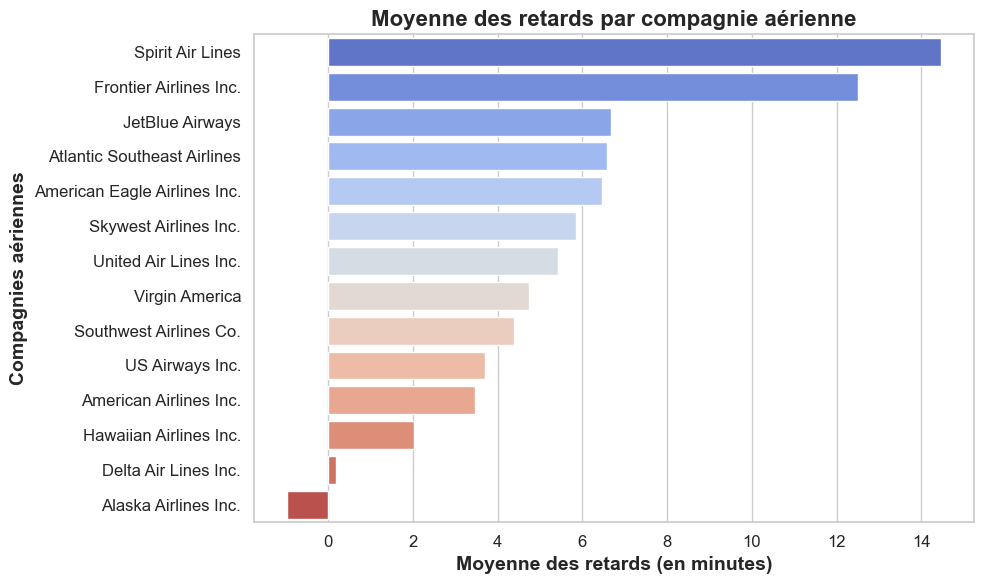

In [18]:

# Tri des compagnies en fonction des moyennes de retard
df_flights_grouped_delay = df_flights_grouped_delay.sort_values('AVG_DELAY_AIRLINE', ascending=False)

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(
    x='AVG_DELAY_AIRLINE', 
    y='AIRLINE', 
    data=df_flights_grouped_delay, 
    palette='coolwarm'
)

# Ajout des détails
plt.title('Moyenne des retards par compagnie aérienne', fontsize=16, weight='bold')
plt.xlabel('Moyenne des retards (en minutes)', fontsize=14, weight='bold')
plt.ylabel('Compagnies aériennes', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Afficher le graphique
plt.show()


Cette visualisation confirme l'assersion vu plutot.
le retard varie considérablement en fonction des compagnie donc la variables **AIRLINE** est à prendre en compte

### 2- Analyse des retards par raport au temps

les variables qui renseigne sur le temp: 
* YEAR	: tous les donnée de cette étude concerne l'année 2015
* MONTH 
* DAY : jour du mois
* DAY_OF_WEEK ; jour de la semaine
* DATE: regroupe YEAR, MONTH et DAY

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\683817205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MONTH', y='ARRIVAL_DELAY', data=avg_delay_month, palette='coolwarm')


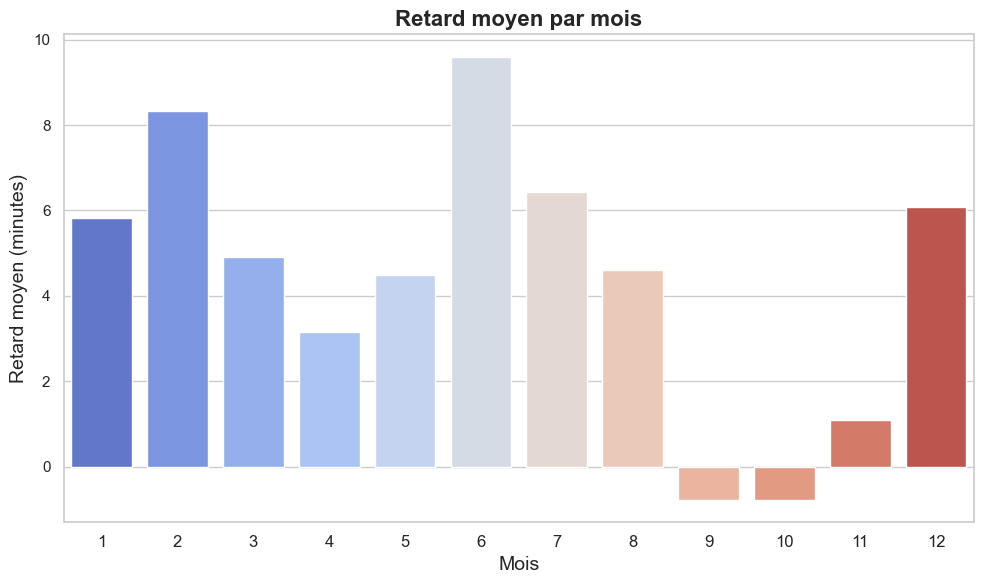

In [19]:
# Retard moyen par mois
avg_delay_month = df_flight.groupby('MONTH')['ARRIVAL_DELAY'].mean().reset_index()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='MONTH', y='ARRIVAL_DELAY', data=avg_delay_month, palette='coolwarm')
plt.title('Retard moyen par mois', fontsize=16, weight='bold')
plt.ylabel('Retard moyen (minutes)', fontsize=14)
plt.xlabel('Mois', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()


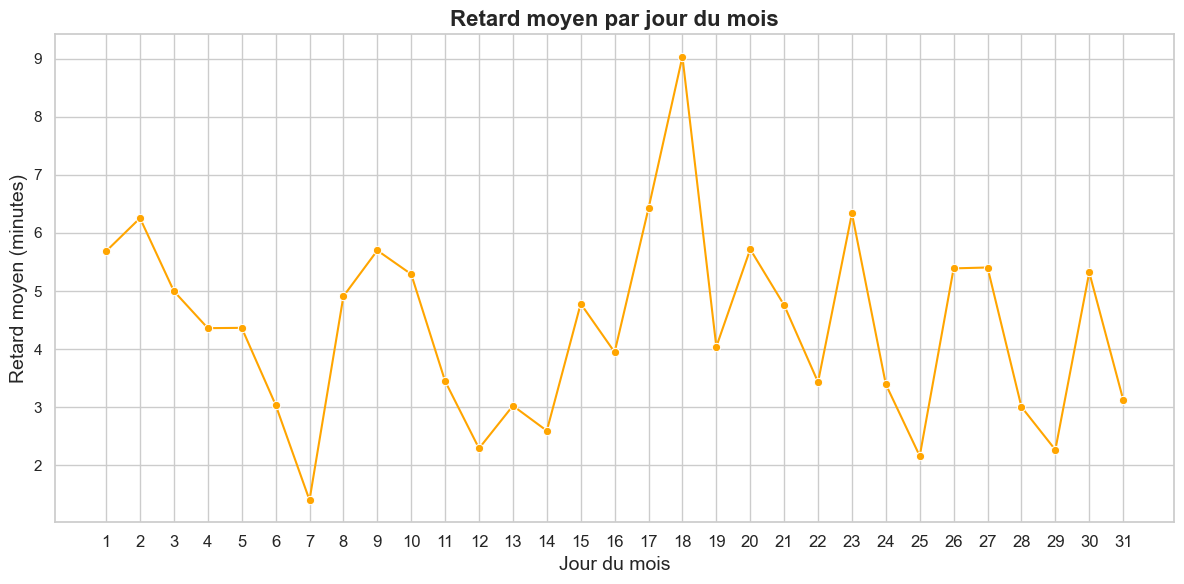

In [20]:
# Retard moyen par jour du mois
avg_delay_day = df_flight.groupby('DAY')['ARRIVAL_DELAY'].mean().reset_index()

# Visualisation
plt.figure(figsize=(12, 6))
sns.lineplot(x='DAY', y='ARRIVAL_DELAY', data=avg_delay_day, marker='o', color='orange')
plt.title('Retard moyen par jour du mois', fontsize=16, weight='bold')
plt.ylabel('Retard moyen (minutes)', fontsize=14)
plt.xlabel('Jour du mois', fontsize=14)
plt.xticks(range(1, 32), fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\debgn\AppData\Local\Temp\ipykernel_544\3291365483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DAY_OF_WEEK_LABEL', y='ARRIVAL_DELAY', data=avg_delay_dow, palette='Spectral')


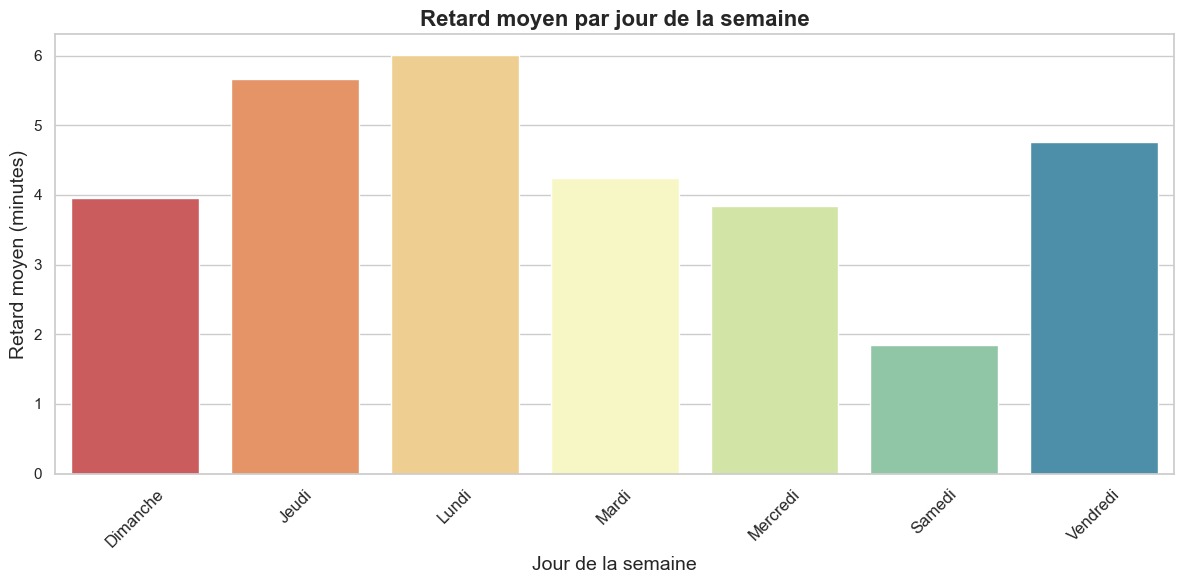

In [21]:
# Correspondance des jours de la semaine
days_mapping = {1: 'Lundi', 2: 'Mardi', 3: 'Mercredi', 4: 'Jeudi', 5: 'Vendredi', 6: 'Samedi', 7: 'Dimanche'}
df_flight['DAY_OF_WEEK_LABEL'] = df_flight['DAY_OF_WEEK'].map(days_mapping)

# Retard moyen par jour de la semaine
avg_delay_dow = df_flight.groupby('DAY_OF_WEEK_LABEL')['ARRIVAL_DELAY'].mean().reset_index()

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x='DAY_OF_WEEK_LABEL', y='ARRIVAL_DELAY', data=avg_delay_dow, palette='Spectral')
plt.title('Retard moyen par jour de la semaine', fontsize=16, weight='bold')
plt.ylabel('Retard moyen (minutes)', fontsize=14)
plt.xlabel('Jour de la semaine', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.tight_layout()
plt.show()


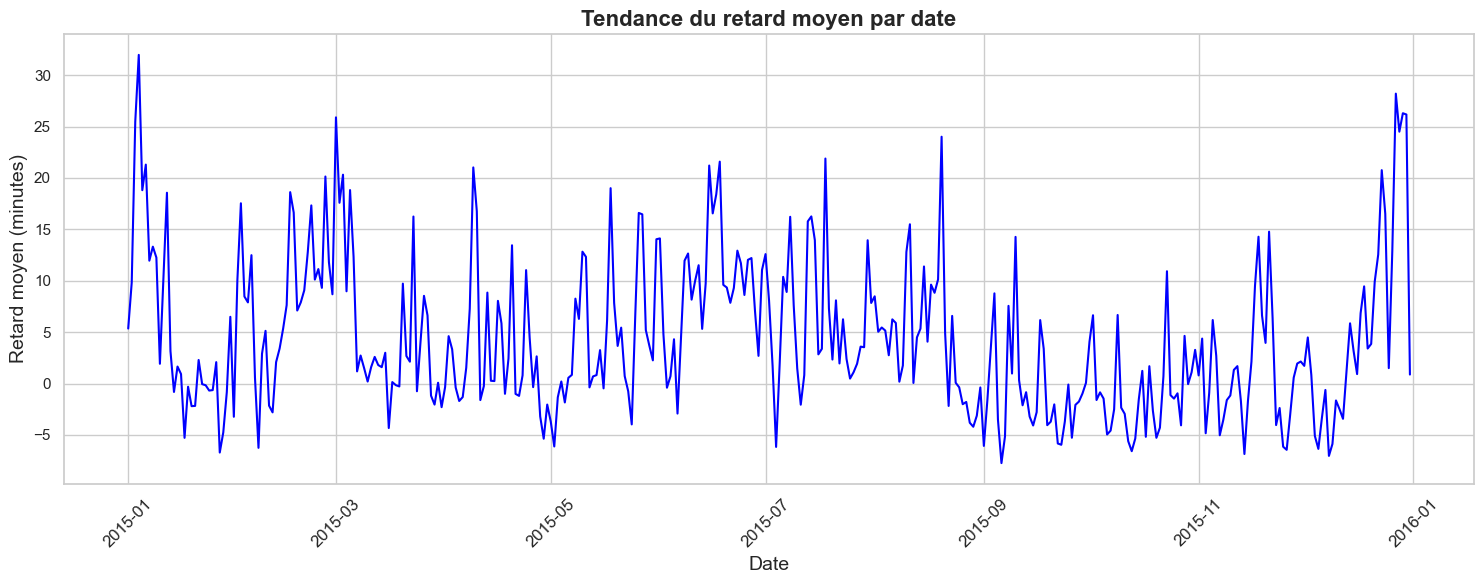

In [22]:
# Retard moyen par date
avg_delay_date = df_flight.groupby('DATE')['ARRIVAL_DELAY'].mean().reset_index()

# Visualisation
plt.figure(figsize=(15, 6))
sns.lineplot(x='DATE', y='ARRIVAL_DELAY', data=avg_delay_date, color='blue')
plt.title('Tendance du retard moyen par date', fontsize=16, weight='bold')
plt.ylabel('Retard moyen (minutes)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.tight_layout()
plt.show()


la chose la plus remarquable de cette analyse est **le Retard moyen par mois** en effet on constate plus de retard en **juin**, **decembre** et **fevrier**. 

En outre en remarque plus de retard en **hiver** (decembre, janvier, février) et en **été** (jun, juillet aout) et tres peu de retard dans les autres saisons(automne, printemps)

pour approfondir cette assertions, nous allons ajouter le facteur des compagnies aériens

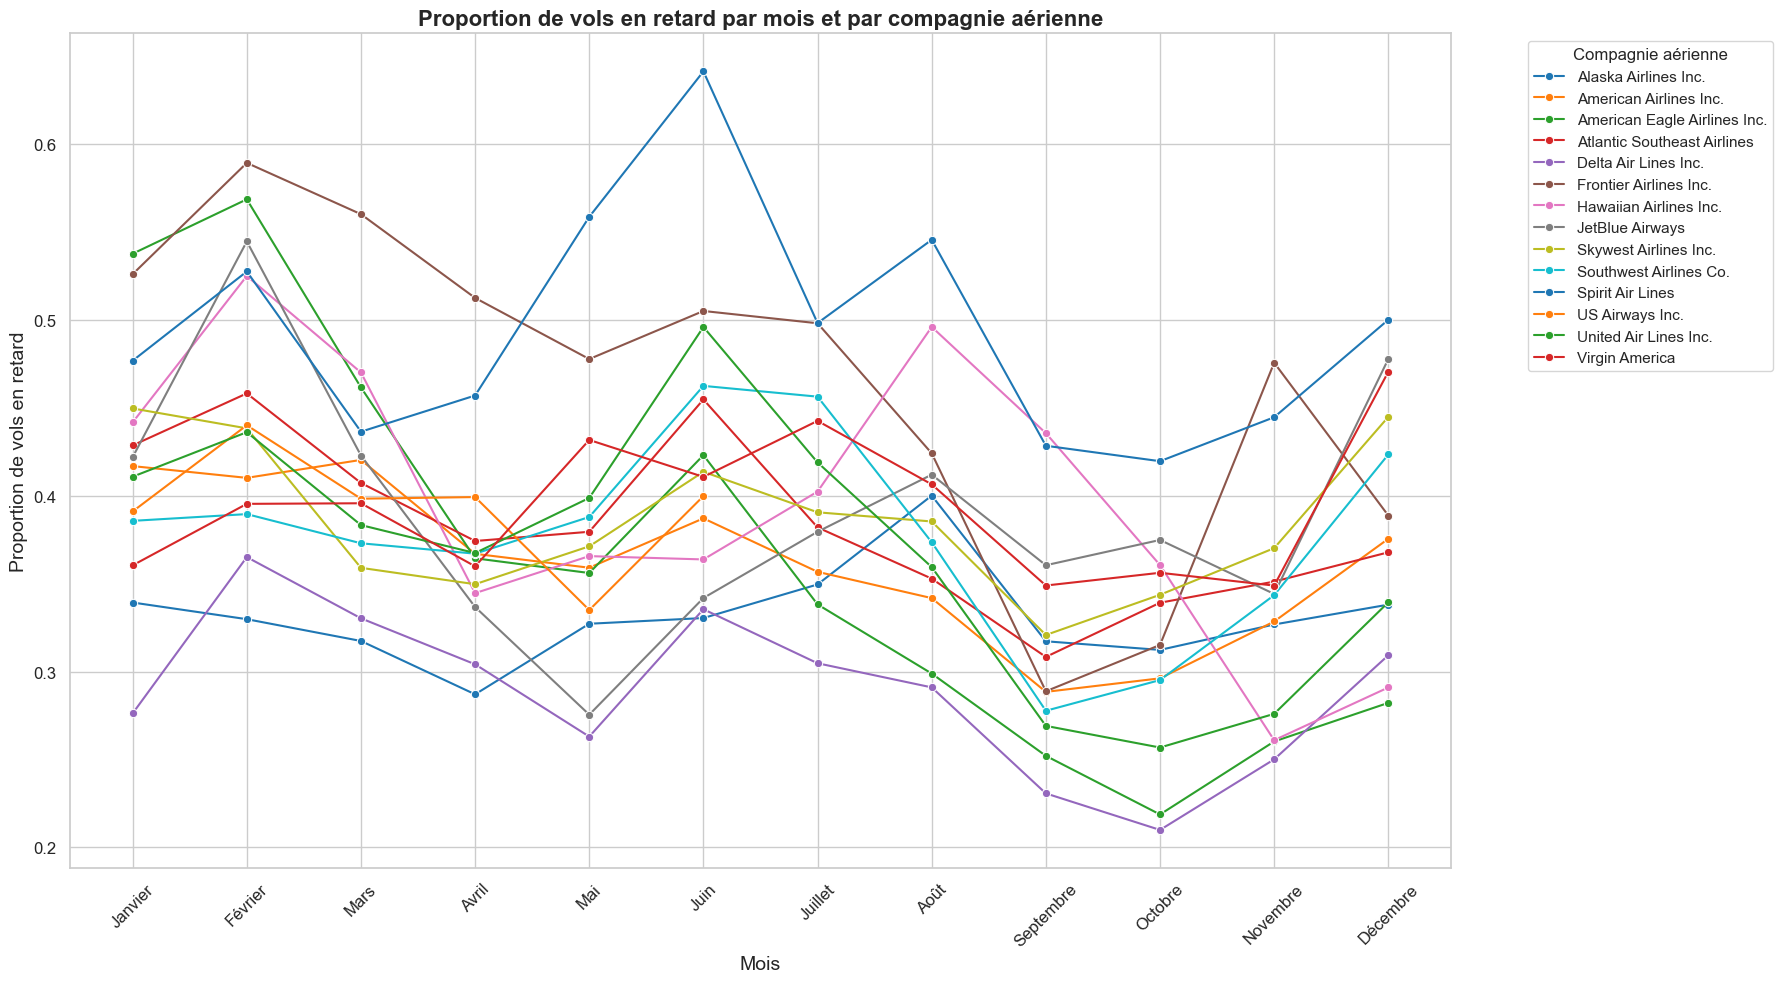

In [23]:
# Correspondance des noms des mois
months_mapping = {
    1: 'Janvier', 2: 'Février', 3: 'Mars', 4: 'Avril', 5: 'Mai', 6: 'Juin',
    7: 'Juillet', 8: 'Août', 9: 'Septembre', 10: 'Octobre', 11: 'Novembre', 12: 'Décembre'
}
df_flight['MONTH_LABEL'] = df_flight['MONTH'].map(months_mapping)

# Calcul du nombre total de vols et de vols en retard par mois et par compagnie
df_monthly_delay = (
    df_flight.groupby(['AIRLINE', 'MONTH_LABEL'])
    .agg(
        TOTAL_FLIGHTS=('ARRIVAL_DELAY', 'count'),
        DELAYED_FLIGHTS=('ARRIVAL_DELAY', lambda x: (x > 0).sum())
    )
    .reset_index()
)

# Calcul de la proportion de vols en retard
df_monthly_delay['DELAY_PROPORTION'] = (
    df_monthly_delay['DELAYED_FLIGHTS'] / df_monthly_delay['TOTAL_FLIGHTS']
)

# Tri des mois pour respecter leur ordre chronologique
df_monthly_delay['MONTH_LABEL'] = pd.Categorical(
    df_monthly_delay['MONTH_LABEL'],
    categories=list(months_mapping.values()),
    ordered=True
)
df_monthly_delay = df_monthly_delay.sort_values(by=['MONTH_LABEL', 'AIRLINE'])

# Visualisation
plt.figure(figsize=(18, 10))
sns.lineplot(
    data=df_monthly_delay,
    x='MONTH_LABEL',
    y='DELAY_PROPORTION',
    hue='AIRLINE',
    marker='o',
    palette='tab10'
)
plt.title('Proportion de vols en retard par mois et par compagnie aérienne', fontsize=16, weight='bold')
plt.ylabel('Proportion de vols en retard', fontsize=14)
plt.xlabel('Mois', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Compagnie aérienne', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


l'asserssion précédente est vérifier, pour chaque compagnie, on remarque des pics en février, juin et décembre 
- le retard varie donc en fonction des mois 

### 3- Analyse des retards par aux destination et au origine des vols

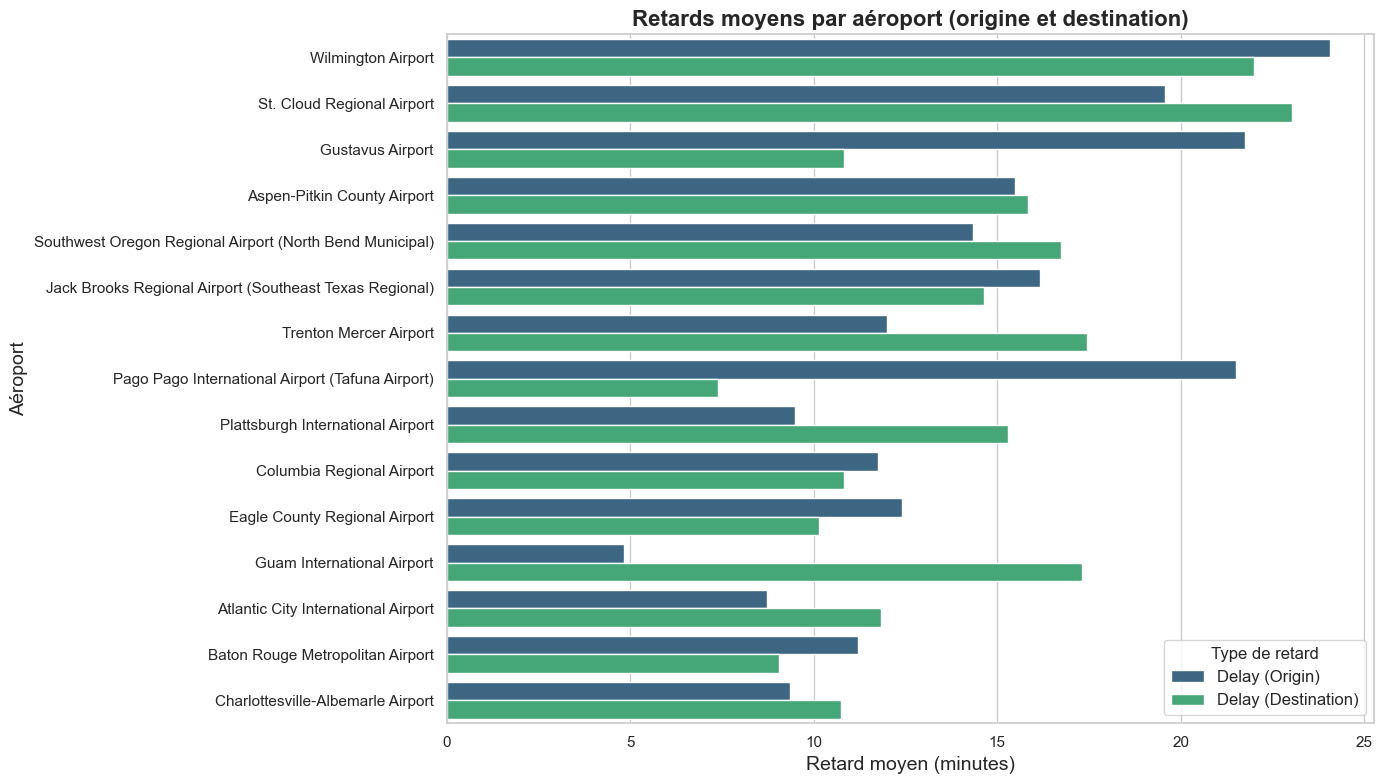

In [24]:


# Calcul du retard moyen par aéroport d'origine
origin_delays = (
    df_flight.groupby(['ORIGIN_AIRPORT_NAME'])
    ['ARRIVAL_DELAY']
    .mean()
    .reset_index()
    .rename(columns={'ARRIVAL_DELAY': 'AVG_DELAY_ORIGIN'})
)

# Calcul du retard moyen par aéroport de destination
destination_delays = (
    df_flight.groupby(['DEST_AIRPORT_NAME'])
    ['ARRIVAL_DELAY']
    .mean()
    .reset_index()
    .rename(columns={'ARRIVAL_DELAY': 'AVG_DELAY_DESTINATION'})
)

# Fusionner les retards moyens par aéroport d'origine et de destination
merged_delays = pd.merge(
    origin_delays,
    destination_delays,
    left_on='ORIGIN_AIRPORT_NAME',
    right_on='DEST_AIRPORT_NAME',
    how='outer',
    suffixes=('_ORIGIN', '_DESTINATION')
)

# Remplacer les NaN par 0 (au cas où certains aéroports n'ont pas de données dans l'une des catégories)
merged_delays = merged_delays.fillna(0)

# Garder uniquement les colonnes nécessaires
merged_delays = merged_delays.rename(
    columns={
        'ORIGIN_AIRPORT_NAME': 'AIRPORT_NAME',
        'AVG_DELAY_ORIGIN': 'Delay (Origin)',
        'AVG_DELAY_DESTINATION': 'Delay (Destination)'
    }
)[['AIRPORT_NAME', 'Delay (Origin)', 'Delay (Destination)']]

# Trier par retard total (origine + destination)
merged_delays['Total Delay'] = merged_delays['Delay (Origin)'] + merged_delays['Delay (Destination)']
merged_delays = merged_delays.sort_values('Total Delay', ascending=False)

# Garder les 15 premiers aéroports avec les retards moyens les plus élevés
top_airports = merged_delays.head(15)

# Restructurer les données pour un graphique groupé
top_airports_melted = top_airports.melt(
    id_vars='AIRPORT_NAME',
    value_vars=['Delay (Origin)', 'Delay (Destination)'],
    var_name='Delay Type',
    value_name='Average Delay'
)

# Visualisation
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_airports_melted,
    x='Average Delay',
    y='AIRPORT_NAME',
    hue='Delay Type',
    palette='viridis'
)
plt.title('Retards moyens par aéroport (origine et destination)', fontsize=16, weight='bold')
plt.xlabel('Retard moyen (minutes)', fontsize=14)
plt.ylabel('Aéroport', fontsize=14)
plt.legend(title='Type de retard', fontsize=12)
plt.tight_layout()
plt.show()


In [25]:
df_flight.head(1)

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  \
0  2015      1    1            4             98      N407AS            ANC   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
0                 SEA                    5          2354.0            -11.0   

   TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  \
0      21.0        15.0           205.0         194.0     169.0      1448   

   WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
0      404.0      4.0                430         408.0          -22.0   

   DIVERTED  CANCELLED CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
0         0          0                 NaN               NaN             NaN   

   AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY       DATE  \
0            NaN                  NaN            NaN 2015-01-01   

                AIRLINE IATA_CODE_x  \
0  Alaska Airlines Inc.         ANC   

                           ORIGIN_AIRPORT_NAME ORIGIN_CITY ORIGIN_STATE  \
0  Ted Stevens Anchorage International Airport   Anchorage           AK   

  ORIGIN_COUNTRY  ORIGIN_LAT  ORIGIN_LON IATA_CODE_y  \
0            USA    61.17432  -149.99619         SEA   

                      DEST_AIRPORT_NAME DEST_CITY DEST_STATE DEST_COUNTRY  \
0  Seattle-Tacoma International Airport   Seattle         WA          USA   

   DEST_LAT   DEST_LON  DELAY_LEVEL DAY_OF_WEEK_LABEL MONTH_LABEL  
0  47.44898 -122.30931            0             Jeudi     Janvier

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


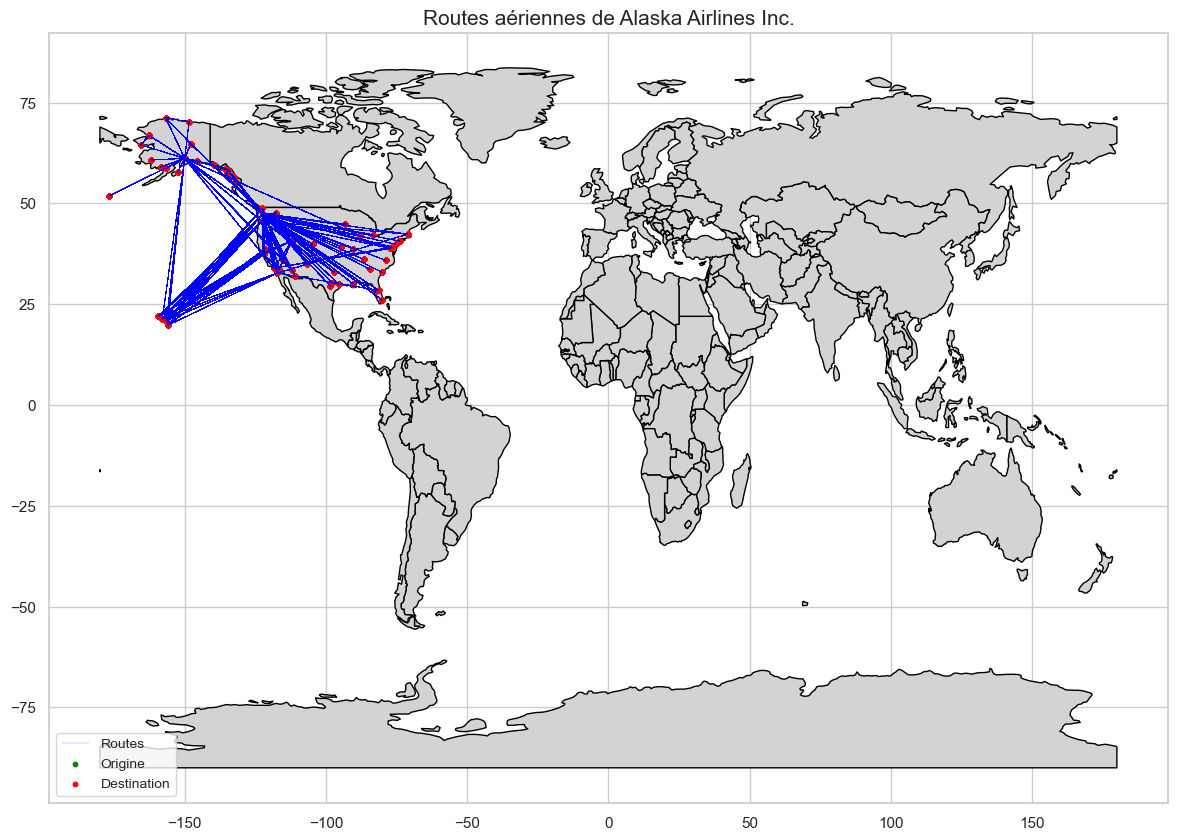

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


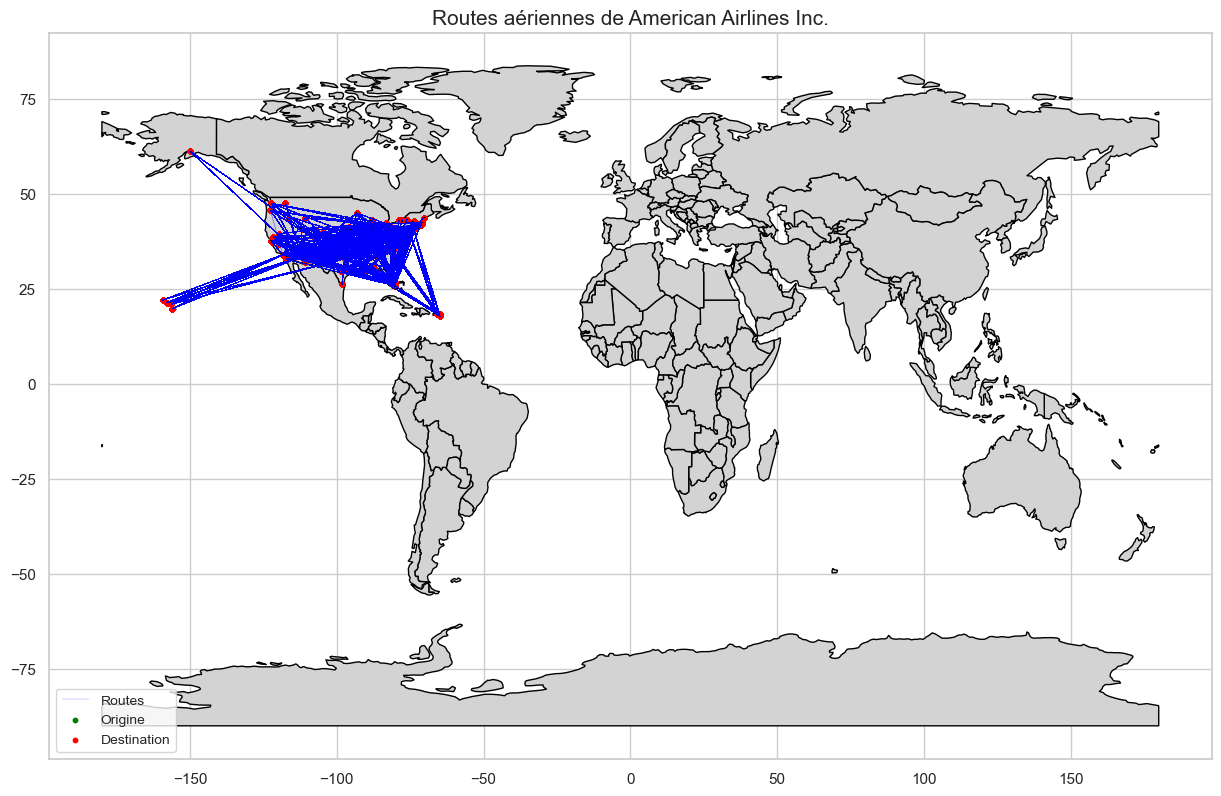

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


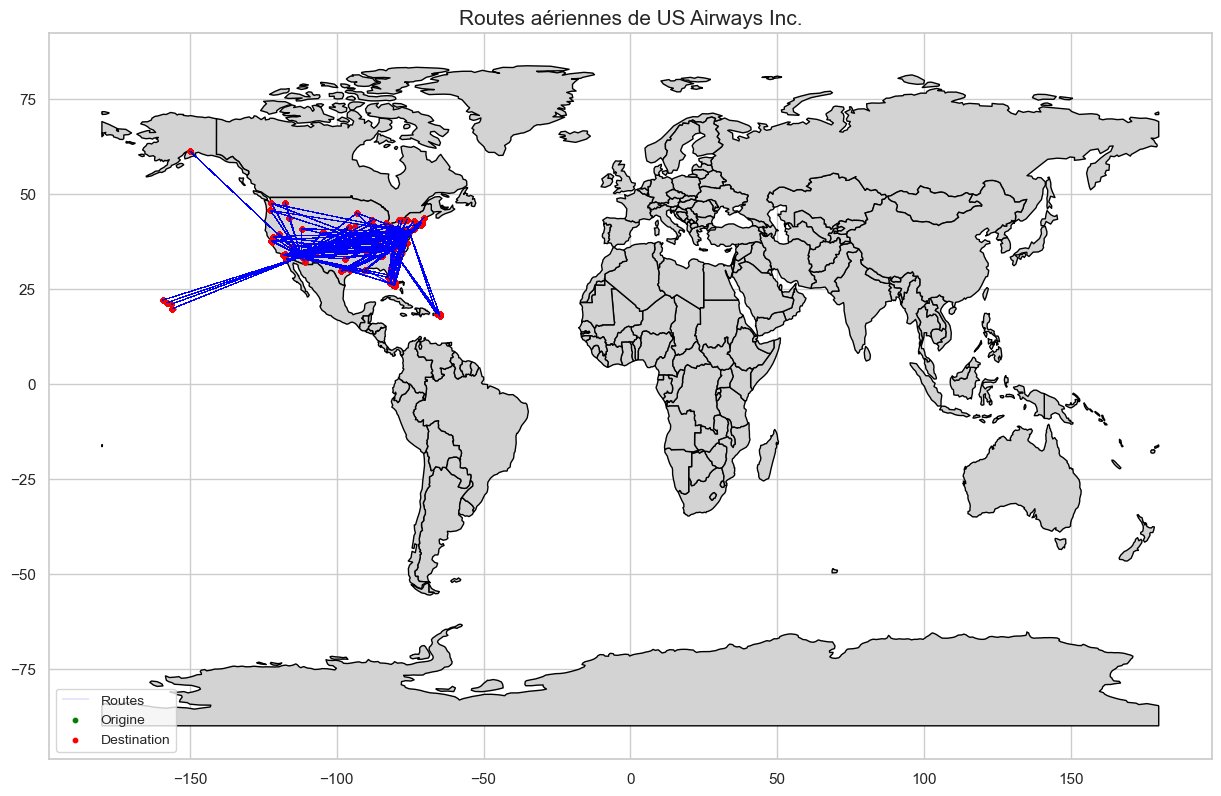

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


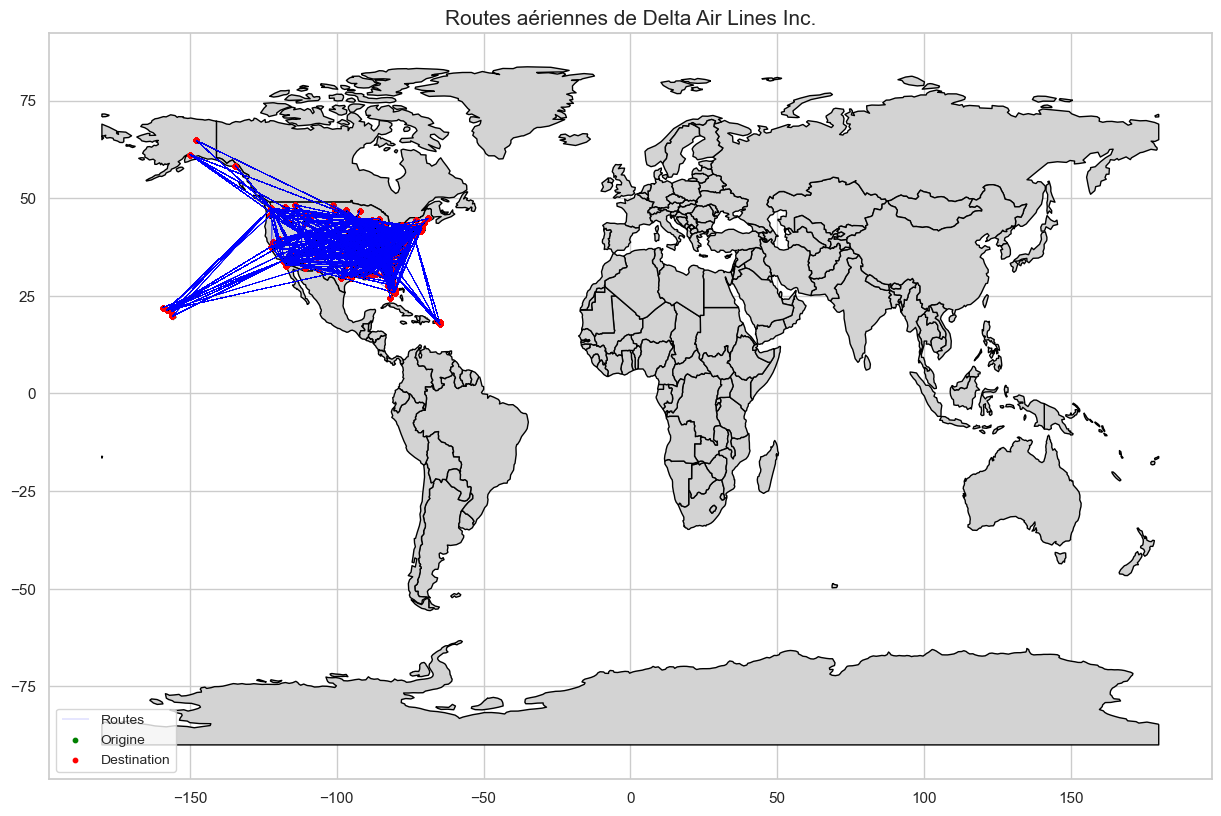

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


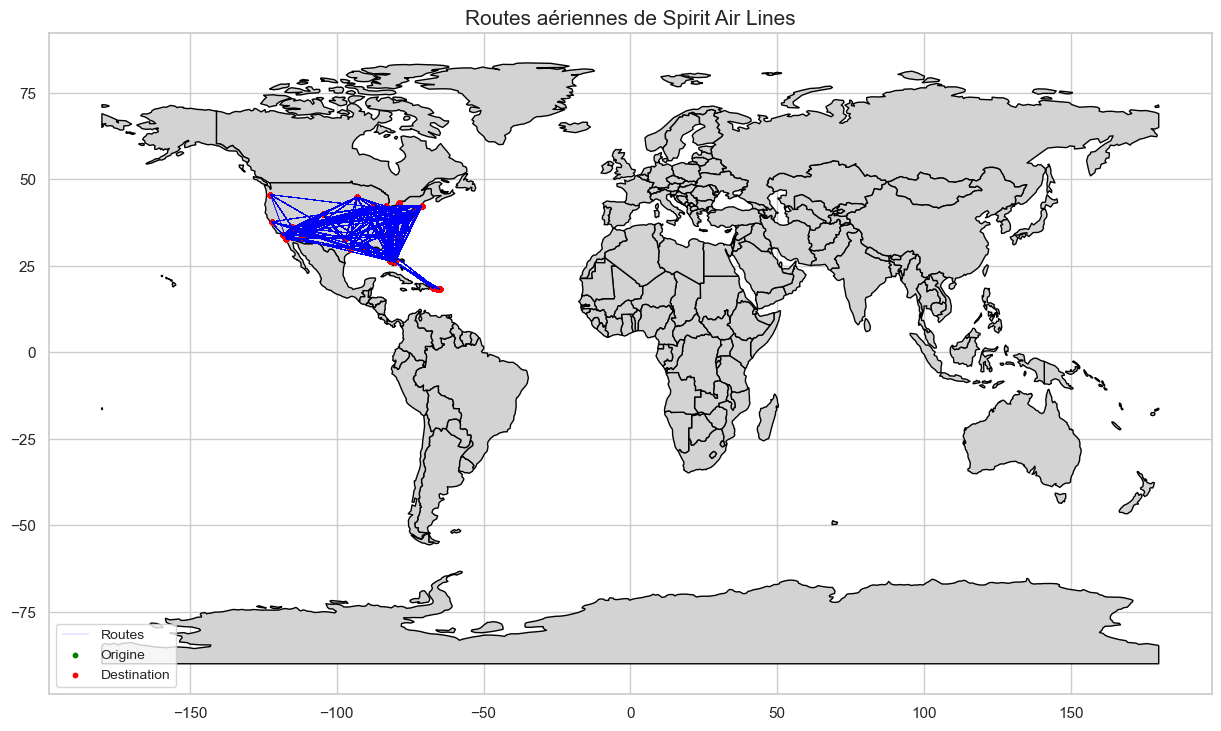

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


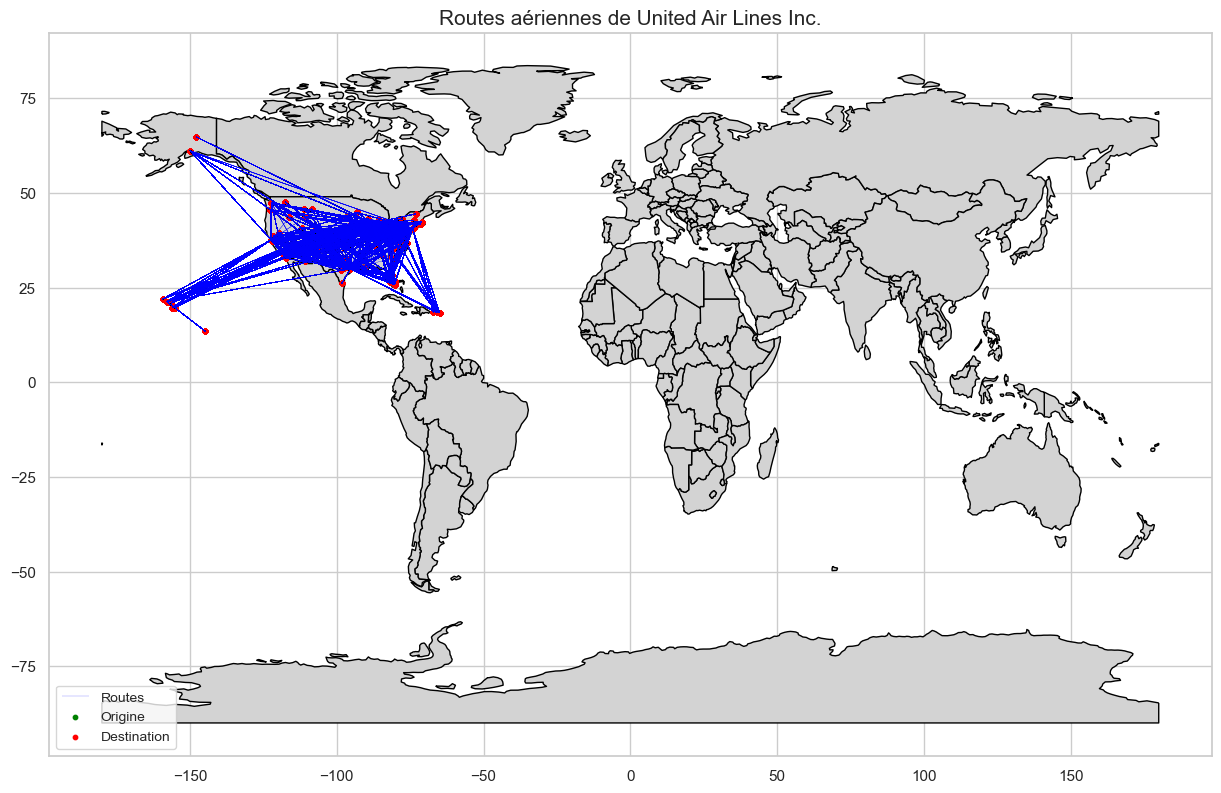

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


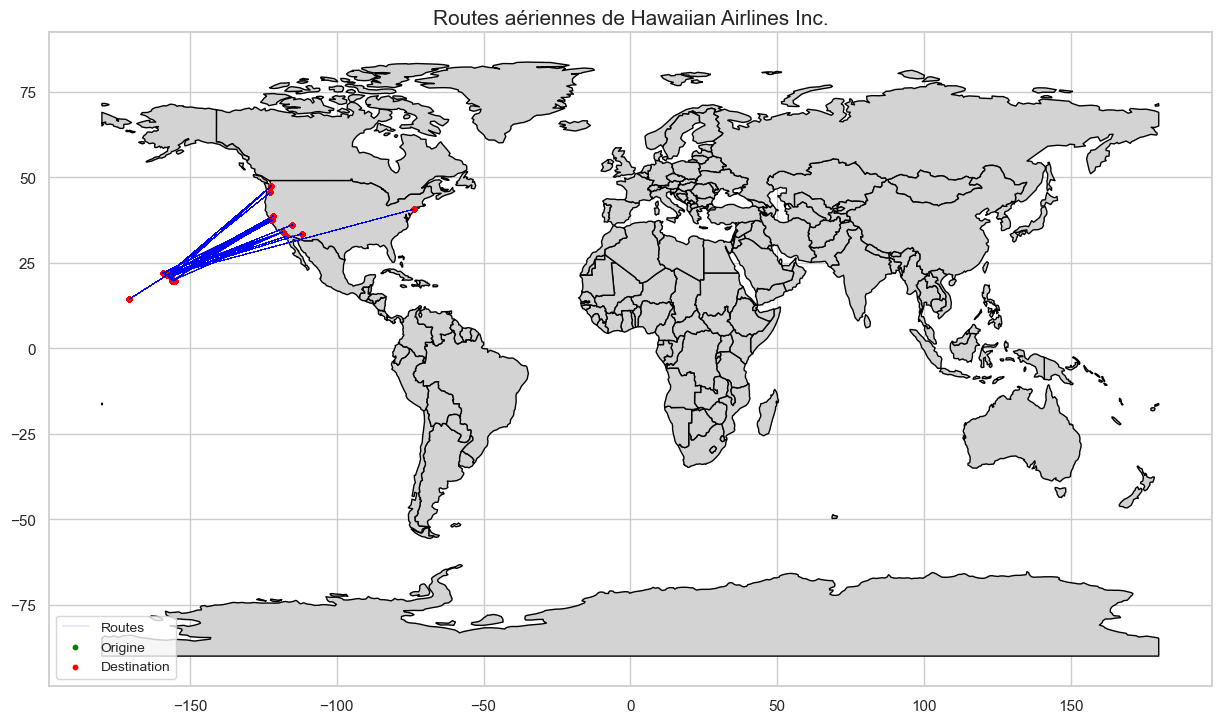

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


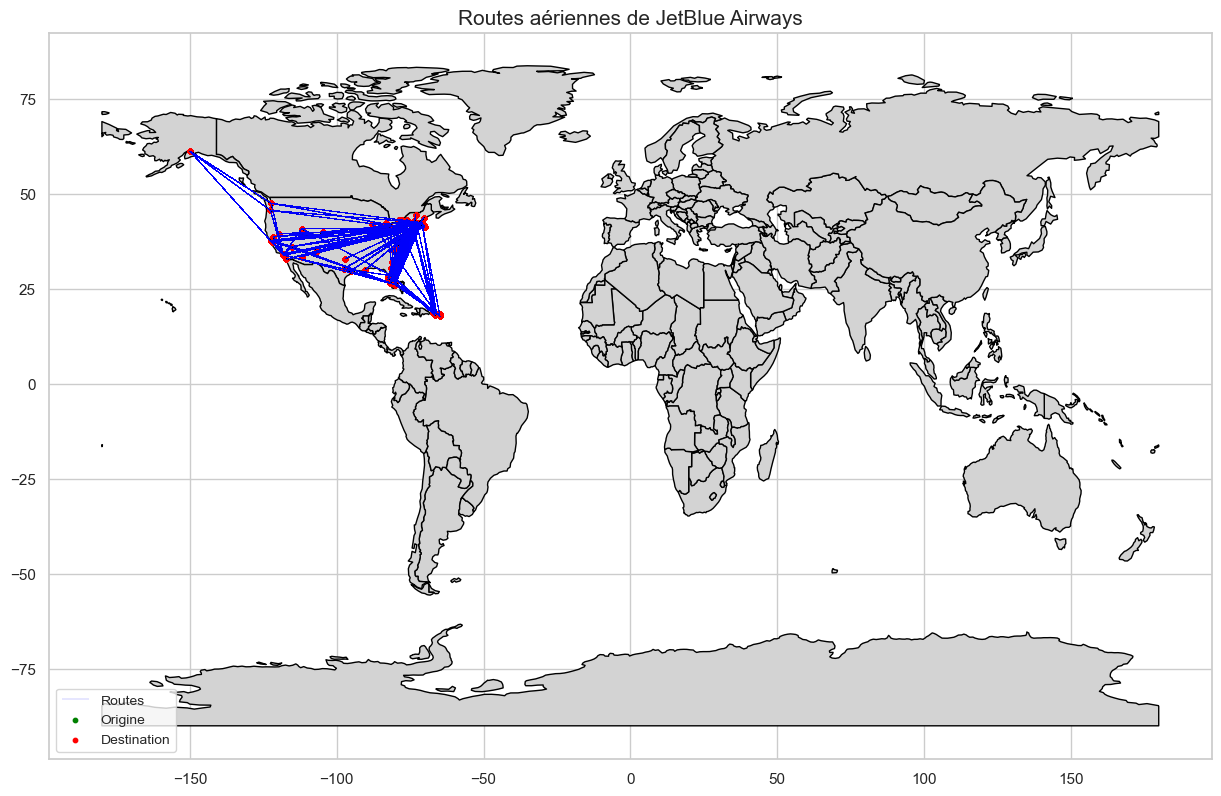

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


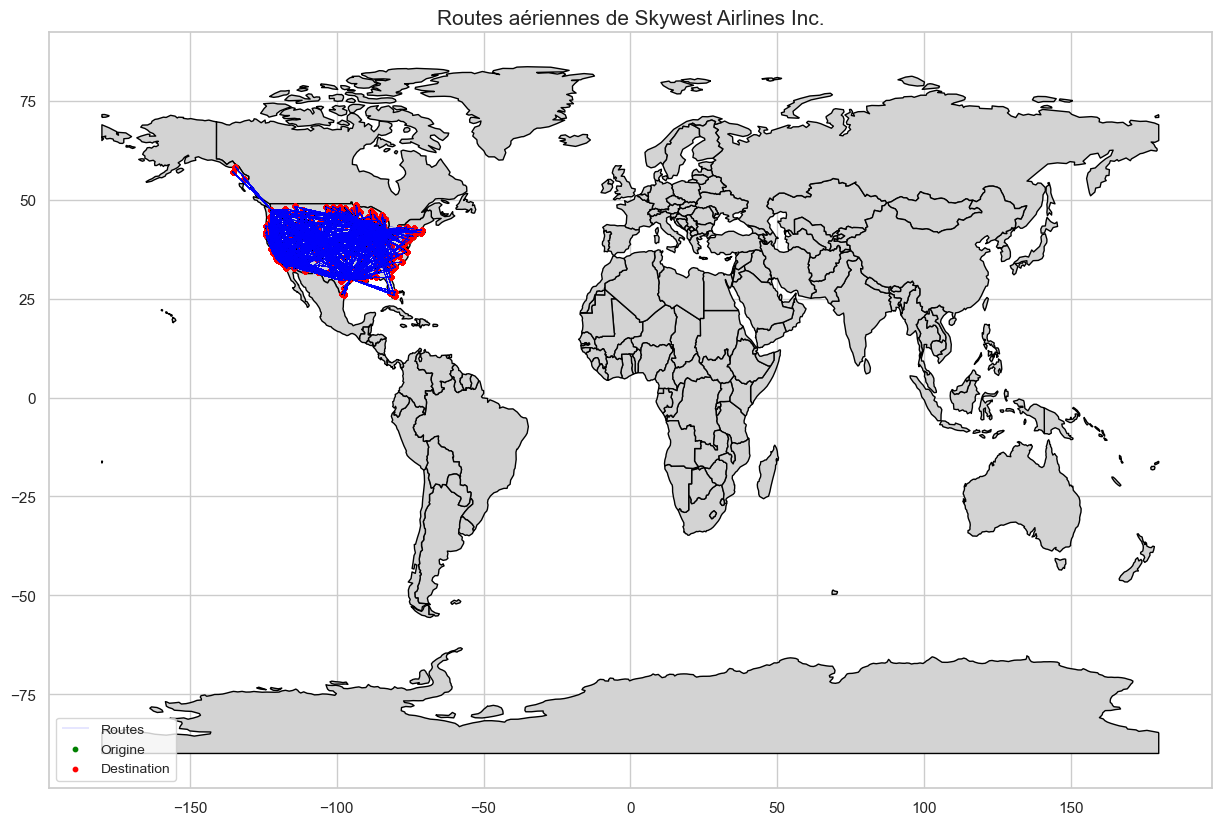

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


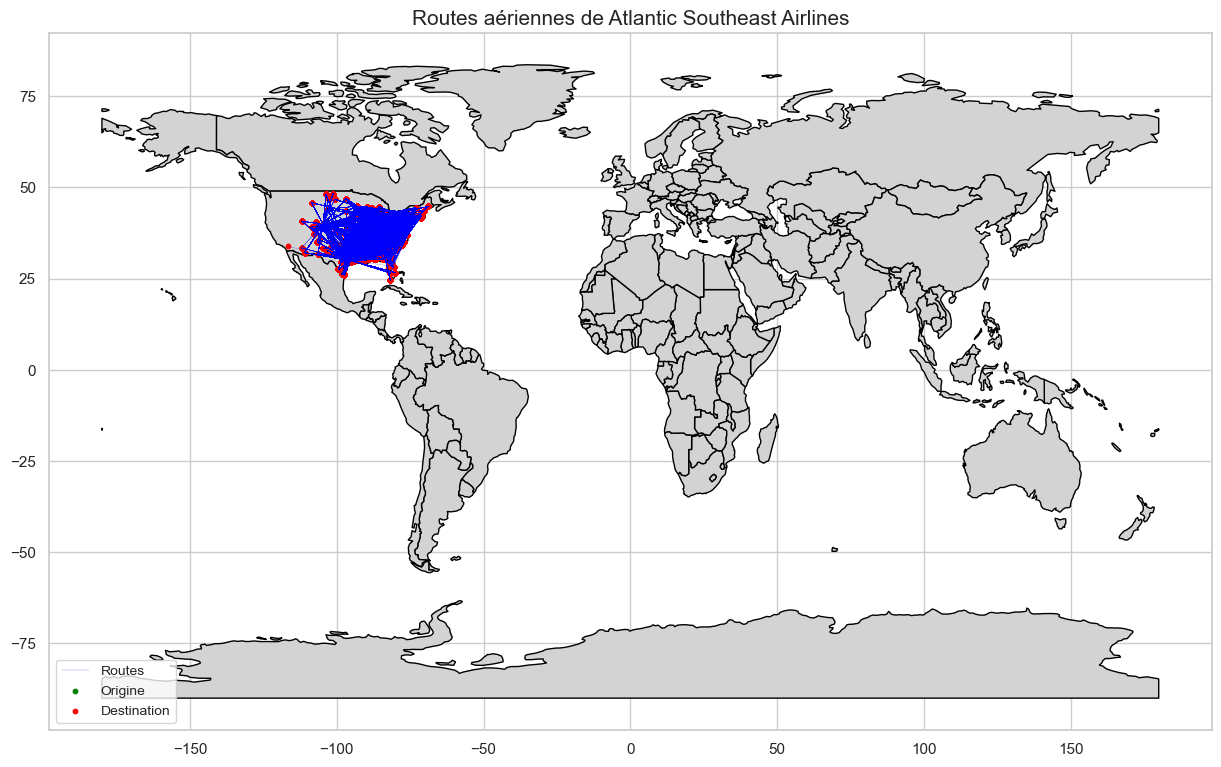

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


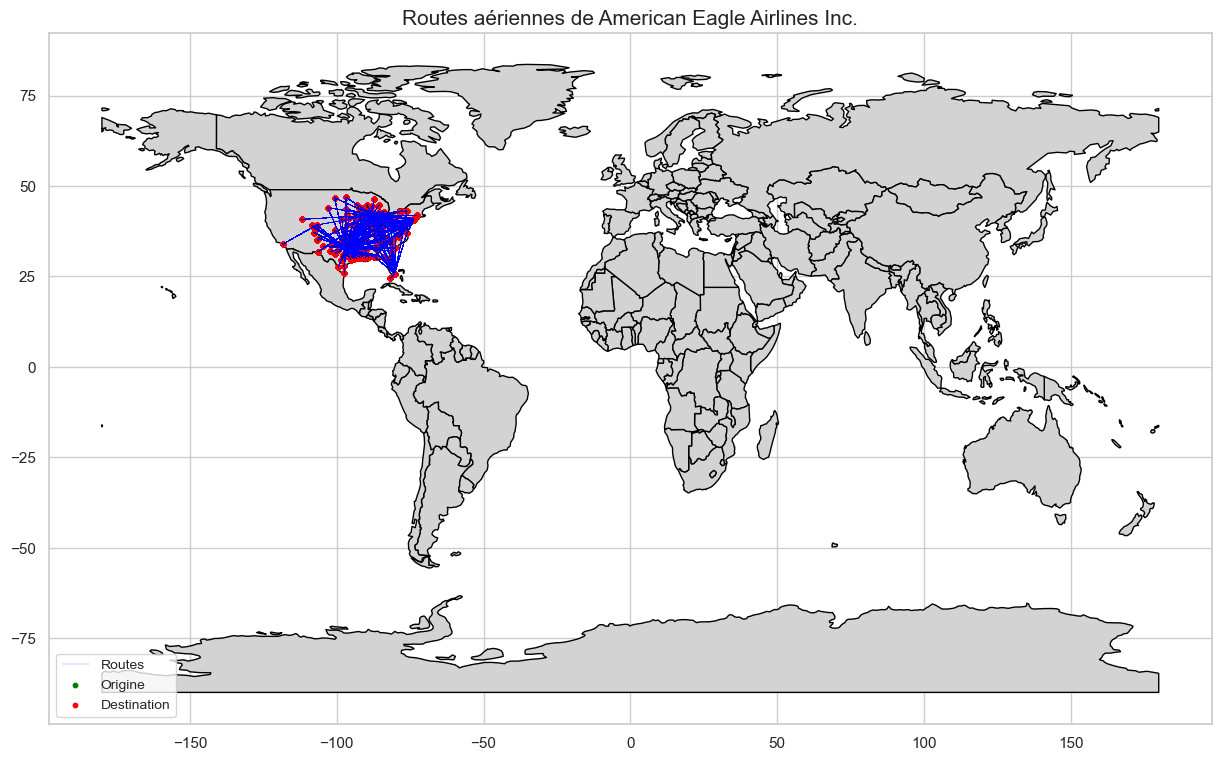

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


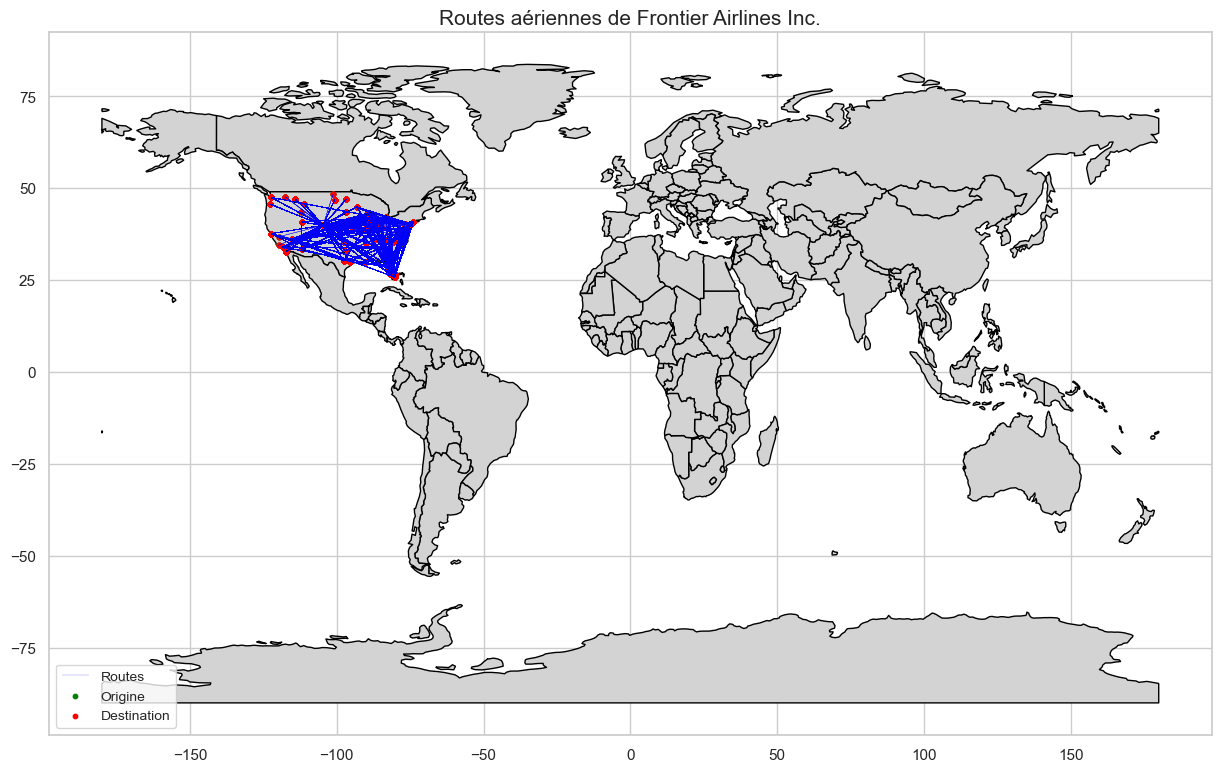

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


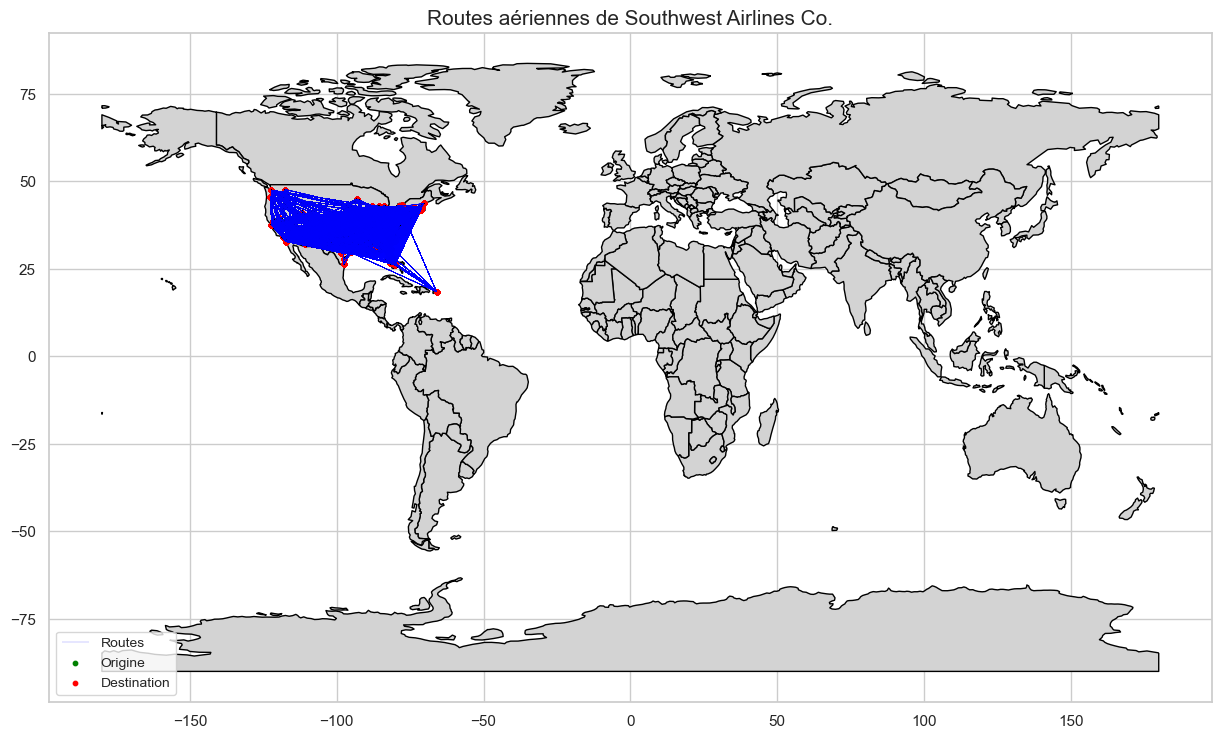

C:\Users\debgn\AppData\Local\Temp\ipykernel_544\391266571.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


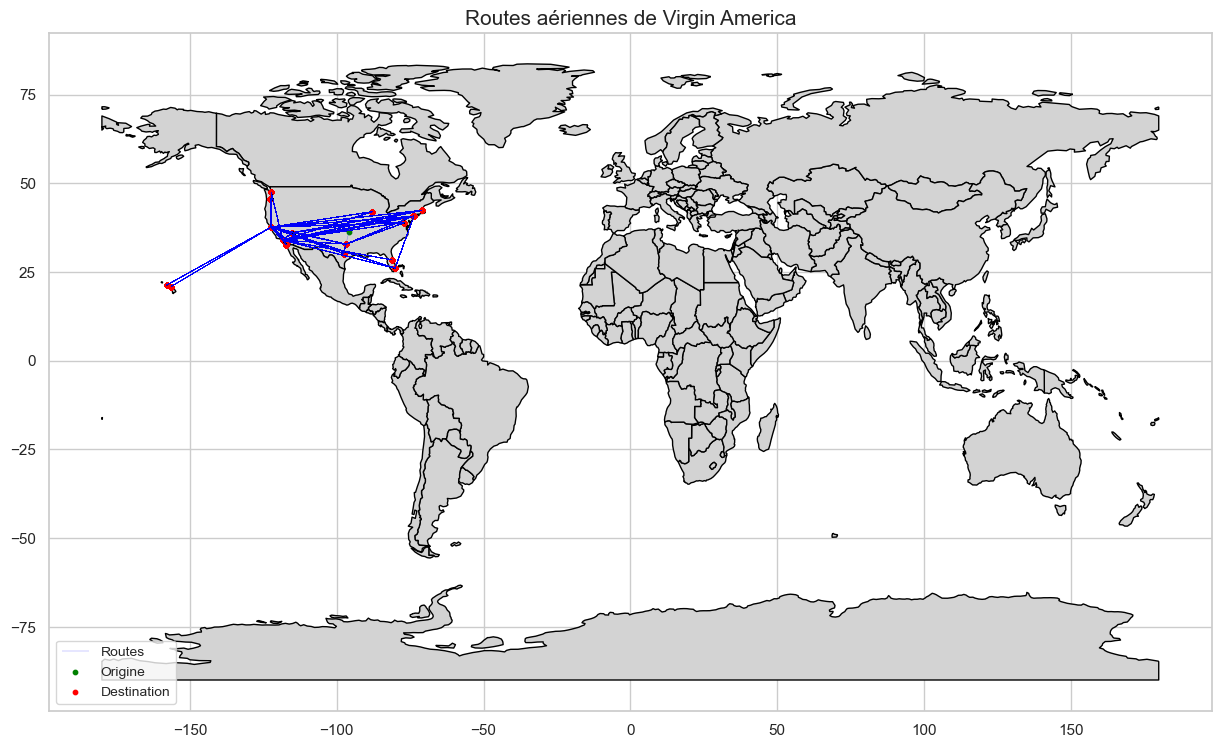

In [26]:
import geopandas as gpd
from shapely.geometry import Point, LineString

# Filtrer les données pour inclure uniquement les lignes avec des coordonnées valides
df_routes = df_flight[
    df_flight['ORIGIN_LAT'].notnull() &
    df_flight['ORIGIN_LON'].notnull() &
    df_flight['DEST_LAT'].notnull() &
    df_flight['DEST_LON'].notnull()
]

# Création des objets géométriques pour les routes
routes = [
    LineString([Point(row['ORIGIN_LON'], row['ORIGIN_LAT']),
                Point(row['DEST_LON'], row['DEST_LAT'])])
    for _, row in df_routes.iterrows()
]

# Conversion en GeoDataFrame
gdf_routes = gpd.GeoDataFrame(df_routes, geometry=routes, crs="EPSG:4326")

# Tracer pour chaque compagnie aérienne
airlines = df_routes['AIRLINE'].unique()

for airline in airlines:
    airline_routes = gdf_routes[gdf_routes['AIRLINE'] == airline]
    
    # Création de la carte
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world.plot(ax=ax, color='lightgrey', edgecolor='black')
    
    # Ajout des routes pour la compagnie actuelle
    airline_routes.plot(ax=ax, color='blue', linewidth=0.2, alpha=0.7, label="Routes")
    
    # Ajout des points d'origine
    ax.scatter(
        airline_routes['ORIGIN_LON'], 
        airline_routes['ORIGIN_LAT'], 
        color='green', 
        s=10, 
        label="Origine"
    )
    
    # Ajout des points de destination
    ax.scatter(
        airline_routes['DEST_LON'], 
        airline_routes['DEST_LAT'], 
        color='red', 
        s=10, 
        label="Destination"
    )
    
    # Titre et légende
    plt.title(f"Routes aériennes de {airline}", fontsize=15)
    plt.legend(loc='lower left', fontsize=10)
    plt.show()


### 4- Analyse des retards par aux type de retards
- <span style="color:blue;">*AIR_SYSTEM_DELAY*</span> : Retard dû aux systèmes de contrôle du trafic aérien (en minutes).
- <span style="color:blue;">*SECURITY_DELAY*</span> : Retard  dû aux contrôles de sécurité (en minutes).
- <span style="color:blue;">*AIRLINE_DELAY*</span> :Retard  causé par la compagnie aérienne (en minutes). 
- <span style="color:blue;">*LATE_AIRCRAFT_DELAY*</span> :  Retard causé par l’arrivée tardive d’un autre avion (en minutes).
- <span style="color:blue;">*WEATHER_DELAY*</span> : Délai causé par des conditions météorologiques (en minutes).

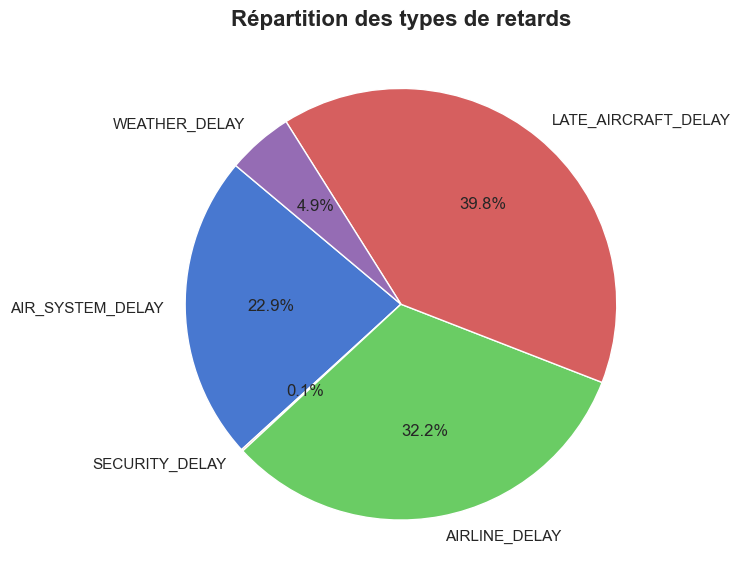

In [27]:
# Sélection des colonnes pertinentes pour l'analyse
delay_columns = [
    'AIR_SYSTEM_DELAY', 
    'SECURITY_DELAY', 
    'AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 
    'WEATHER_DELAY'
]

# Calcul du total et du retard moyen pour chaque type
delay_stats = (
    df_flight[delay_columns]
    .mean()
    .reset_index()
    .rename(columns={'index': 'Delay_Type', 0: 'Average_Delay'})
)

# Ajout d'une colonne pour représenter le pourcentage de chaque type de retard
delay_stats['Percentage'] = (
    delay_stats['Average_Delay'] / delay_stats['Average_Delay'].sum() * 100
)


# Visualisation des contributions des types de retards
plt.figure(figsize=(8, 6))
plt.pie(
    delay_stats['Percentage'], 
    labels=delay_stats['Delay_Type'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('muted', len(delay_stats))
)
plt.title('Répartition des types de retards', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


### 6- Corélation

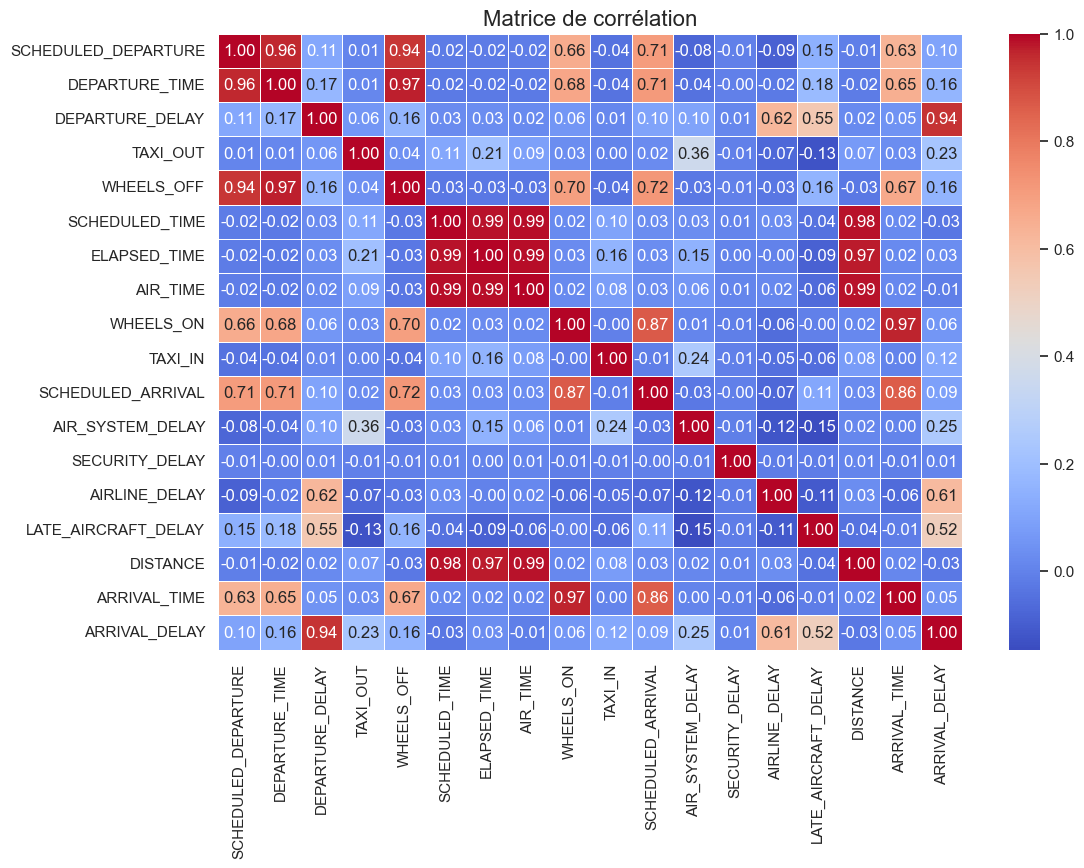

In [18]:
# Sélection des colonnes numériques pertinentes pour la corrélation
numerical_columns = [ 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 
                     'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 
                     'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 
                     'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'DISTANCE',
                     'ARRIVAL_TIME','ARRIVAL_DELAY']

# Extraction des colonnes pertinentes
df_corr = df_flight[numerical_columns]

# Calcul de la matrice de corrélation
correlation_matrix = df_corr.corr()

# Visualisation avec Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation', fontsize=16)
plt.show()


* les variables realtive au temps sont tres faiblement corrélé au retard d'arrivé
- <span style="color:blue;">*MONTH*</span> 
- <span style="color:blue;">*DAY*</span> 
- <span style="color:blue;">*DAY_OF_WEEK*</span> 

* la variable **DEPARTURE_DELAY** est tres corélé au retard

* les variables  **SCHEDULED_DEPARTURE** , **DEPARTURE_TIME** et **WHEELS_OFF** sont fortement corrélé : cette coherence est évdente car ces variables sont relative au temp du départ, on peu donc garder une de ses variable . on peut eliminer **SCHEDULED_DEPARTURE** et **WHEELS_OFF**

* **SCHEDULED_TIME** et **DISTANCE** sont fortement corrélé, c'est logique car l'un est l'estimation de l'autre
* Nous avons aussi une forte corélation entre les variables **AIR_TIME**, **ELAPSED_TIME** et **SCHEDULED_TIME**, leur correation forme un carré bien visible dans la matrice de corelation . On peut eliminer **AIR_TIME** car **ELAPSED_TIME** contient sont information. 


**AIRLINE** 
**DISTANCE**
**DEPARTURE_DELAY**
**SCHEDULED_TIME**
**AIRLINE_DELAY** 
**WHEELS_ON**
**SCHEDULED_ARRIVAL**
**AIR_SYSTEM_DELAY'**
 **'SECURITY_DELAY'**
**AIRLINE_DELAY**
**LATE_AIRCRAFT_DELAY**
**origine**
**destination**


### 7- Analyse statistique

In [41]:
df_flight[['DEPARTURE_DELAY','ARRIVAL_DELAY']].describe()

DEPARTURE_DELAY  ARRIVAL_DELAY
count     5.732926e+06   5.714008e+06
mean      9.370158e+00   4.407057e+00
std       3.708094e+01   3.927130e+01
min      -8.200000e+01  -8.700000e+01
25%      -5.000000e+00  -1.300000e+01
50%      -2.000000e+00  -5.000000e+00
75%       7.000000e+00   8.000000e+00
max       1.988000e+03   1.971000e+03

* La majorité des vols partent et arrivent avec des retards minimes, voire en avance.
Une récupération du retard au départ est souvent observée, car le retard moyen à l'arrivée est plus faible que celui au départ.
Cependant, la grande variabilité (écart-type élevé) et les valeurs extrêmes (maximums élevés) soulignent que certains vols rencontrent des retards exceptionnels.

Essaiyons de commprendre ces retard exceptionelle 

#### catégorisation des retards d'arrivée des vols en plusieurs intervalles 

In [ ]:
import pandas as pd

# Définir les intervalles et les étiquettes
bins = [-float("inf"), 0, 100, 300, 500, 1000, 1500,2000]
labels = ['<=0', '1-100', '101-300', '301-500', '501-1000', '1001-1500','1501-2000']

# Créer une nouvelle colonne avec les intervalles
df_flight['Arrival_Delay_Category'] = pd.cut(df_flight["ARRIVAL_DELAY"], bins=bins, labels=labels, right=True)

# Calculer l'effectif pour chaque intervalle
effectifs = df_flight['Arrival_Delay_Category'].value_counts().sort_index().reset_index()
effectifs.columns = ['Modalité', 'Effectif']

# Calculer l'effectif cumulé
effectifs['Effectif cumulé'] = effectifs['Effectif'].cumsum()

# Calculer la fréquence pour chaque intervalle
effectifs['Fréquence'] = effectifs['Effectif'] / len(df_flight)

# Afficher les statistiques descriptives
print(effectifs)


    Modalité  Effectif  Effectif cumulé  Fréquence
0        <=0   3627112          3627112   0.623314
1      1-100   1929435          5556547   0.331571
2    101-300    146419          5702966   0.025162
3    301-500      8840          5711806   0.001519
4   501-1000      1936          5713742   0.000333
5  1001-1500       246          5713988   0.000042
6  1501-2000        20          5714008   0.000003
7   sup 2000         0          5714008   0.000000


Ce tableau montre que :
La majorité des vols (79%) ont un retard faible ou modéré (entre <=0 et 1-100).
Les retards très importants (>500 minutes) sont peu fréquents (environ 3% des vols).

In [ ]:
threshold = 120 # 2h
exceptional_delays = df_flight[
    (df_flight['DEPARTURE_DELAY'] > threshold) | 
    (df_flight['ARRIVAL_DELAY'] > threshold)
]

# Retards par compagnie aérienne
airline_delays = exceptional_delays.groupby('AIRLINE')['ARRIVAL_DELAY'].count()
print(airline_delays)


AIRLINE
Alaska Airlines Inc.             1660
American Airlines Inc.          15216
American Eagle Airlines Inc.     7594
Atlantic Southeast Airlines     15080
Delta Air Lines Inc.            15180
Frontier Airlines Inc.           3434
Hawaiian Airlines Inc.            337
JetBlue Airways                  7746
Skywest Airlines Inc.           13148
Southwest Airlines Co.          22040
Spirit Air Lines                 4755
US Airways Inc.                  2991
United Air Lines Inc.           16404
Virgin America                   1284
Name: ARRIVAL_DELAY, dtype: int64


In [14]:
# Retards par jour de la semaine ou mois
day_delays = exceptional_delays.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].count()
day_delays

DAY_OF_WEEK
1    22408
2    19015
3    17270
4    19840
5    17893
6    13005
7    17438
Name: ARRIVAL_DELAY, dtype: int64

In [15]:
# Retards par jour de la semaine ou mois
month_delays = exceptional_delays.groupby('MONTH')['ARRIVAL_DELAY'].count()
month_delays

MONTH
1     10119
2     11088
3     10470
4      8952
5     11494
6     16547
7     13092
8     11642
9      6025
10     6229
11     7970
12    13241
Name: ARRIVAL_DELAY, dtype: int64

Ces resultats confirme que les jours de la semaines, influence tres peu les retard, ce sont les mois ou les saisons qui ont le plus d'influence 